In [830]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [831]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [832]:
df_test = pd.read_csv('./data/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [833]:
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [834]:
print("TRAIN DATA")
df_train.info()
print("\n")
print("TEST DATA")
df_test.info()

TRAIN DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [835]:
df_test.shape

(1459, 80)

In [836]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Drop Columns with high percentage of missing values

In [837]:
drop_columns = [
 "Alley",
# "MasVnrType",
 "PoolQC",
 "Fence",
 "MiscFeature"   
]

df_train = df_train.drop(drop_columns, axis=1)
df_test = df_test.drop(drop_columns, axis=1)

# Fill missing values

In [838]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('None')
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('None')

In [839]:
df_train["HasGarage"] = df_train["GarageType"].notna().astype(int)
df_test["HasGarage"] = df_test["GarageType"].notna().astype(int)

cat_cols = ["GarageQual", "GarageCond", "GarageFinish", "GarageType"]
df_train[cat_cols] = df_train[cat_cols].fillna("None")
df_test[cat_cols] = df_test[cat_cols].fillna("None")

df_train["GarageYrBltMissing"] = df_train["GarageYrBlt"].isna().astype(int)
df_test["GarageYrBltMissing"] = df_test["GarageYrBlt"].isna().astype(int)

df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(0)
df_test["GarageYrBlt"] = df_test["GarageYrBlt"].fillna(0)

num_cols = ["GarageCars", "GarageArea"]
df_train[num_cols] = df_train[num_cols].fillna(0)
df_test[num_cols] = df_test[num_cols].fillna(0)


In [840]:
cat_cols = ["BsmtCond", "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]

df_train[cat_cols] = df_train[cat_cols].fillna("None")
df_test[cat_cols] = df_test[cat_cols].fillna("None")

num_cols = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]
df_train[num_cols] = df_train[num_cols].fillna(0)
df_test[num_cols] = df_test[num_cols].fillna(0)


In [841]:
df_train['OpenPorchSF'] = df_train['OpenPorchSF'].fillna(0)
df_test['OpenPorchSF'] = df_test['OpenPorchSF'].fillna(0)

In [842]:
df_train["HasMasVnr"] = df_train["MasVnrType"].notna().astype(int)
df_test["HasMasVnr"] = df_test["MasVnrType"].notna().astype(int)

df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_test["MasVnrType"] = df_test["MasVnrType"].fillna("None")

df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)
df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna(0)

In [843]:
df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])

In [844]:
df_train["Electrical"] = df_train["Electrical"].fillna(df_train["Electrical"].mode()[0])
df_test["Electrical"] = df_test["Electrical"].fillna(df_test["Electrical"].mode()[0])

In [845]:
skip_columns = ["Id"]

MSSubClass
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


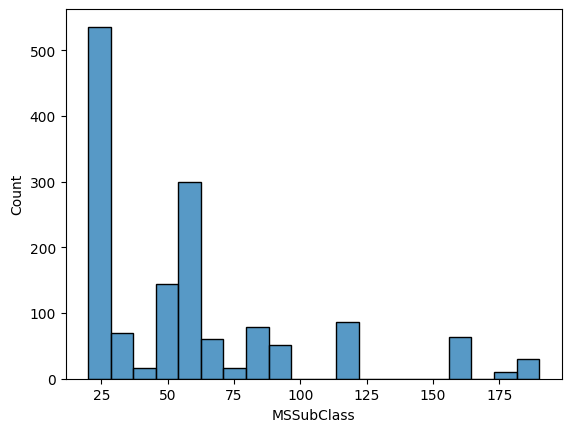



MSZoning
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object


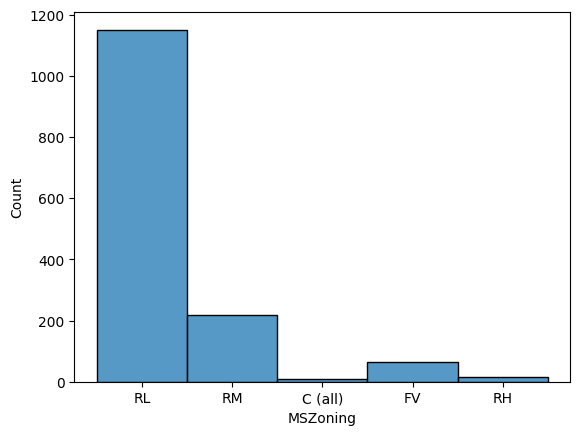



LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


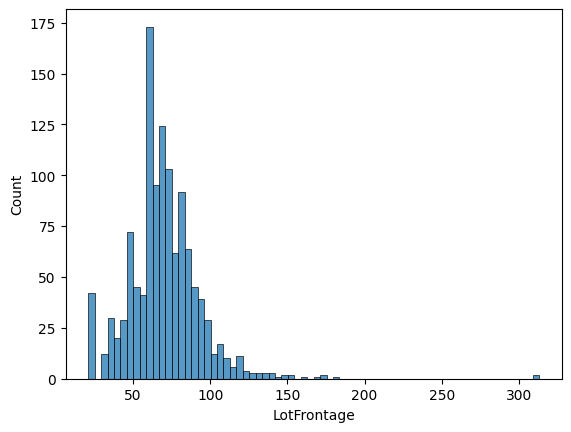



LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


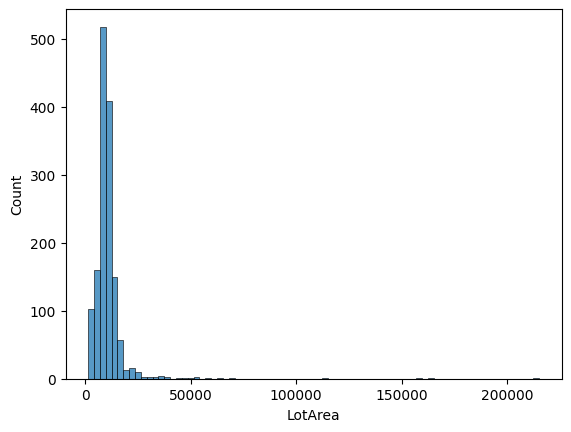



Street
count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object


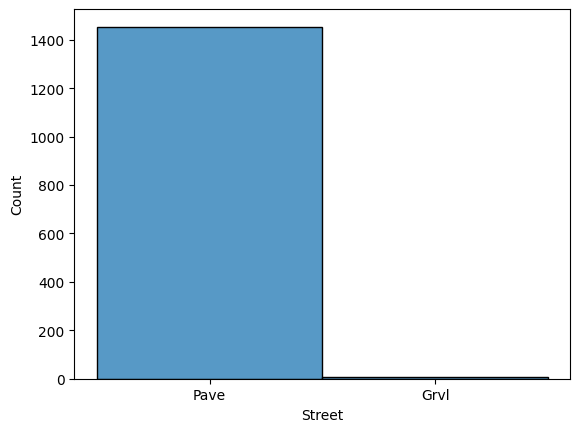



LotShape
count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object


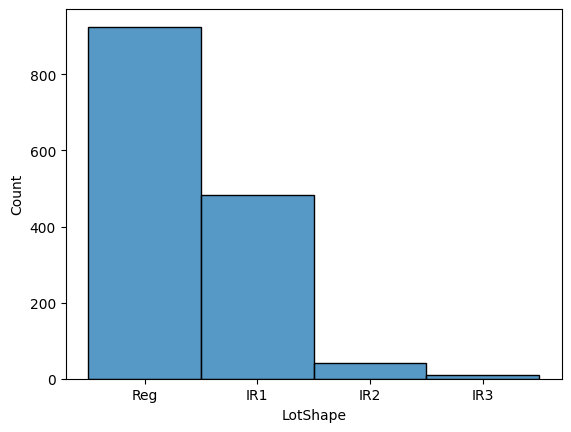



LandContour
count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object


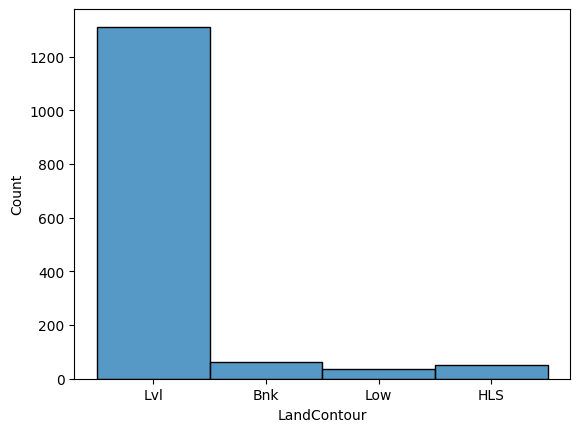



Utilities
count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object


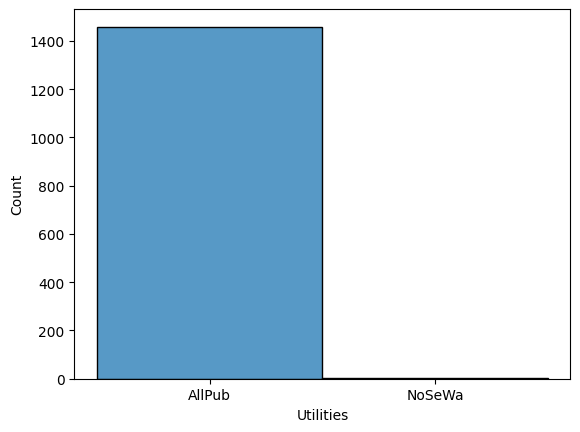



LotConfig
count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object


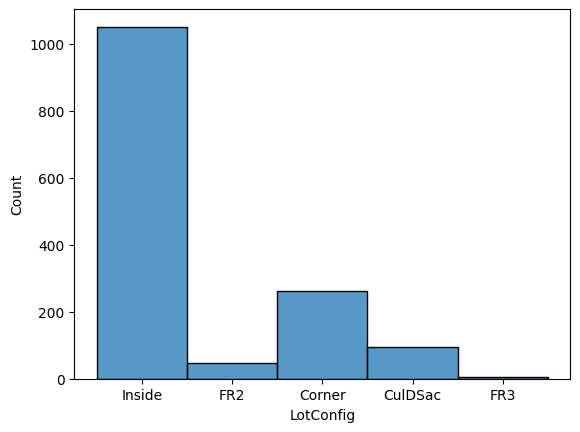



LandSlope
count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object


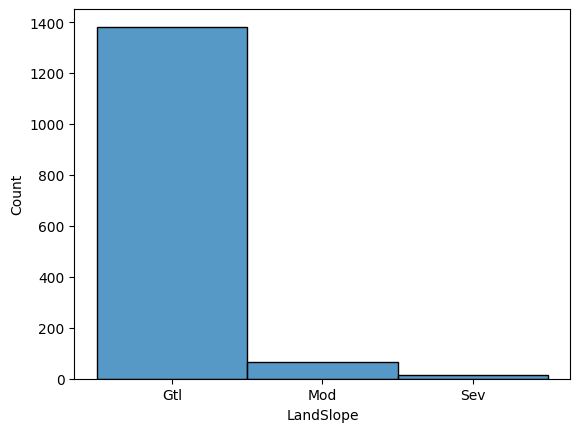



Neighborhood
count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object


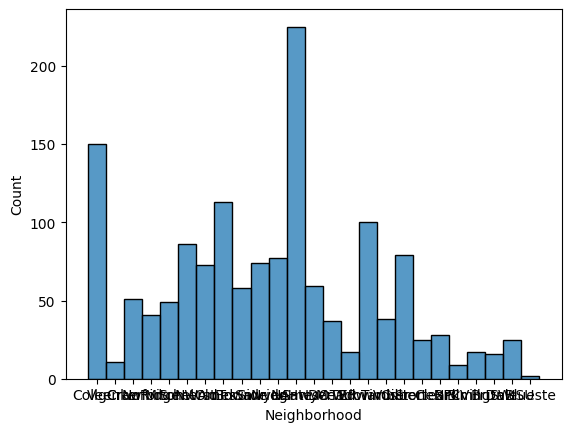



Condition1
count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object


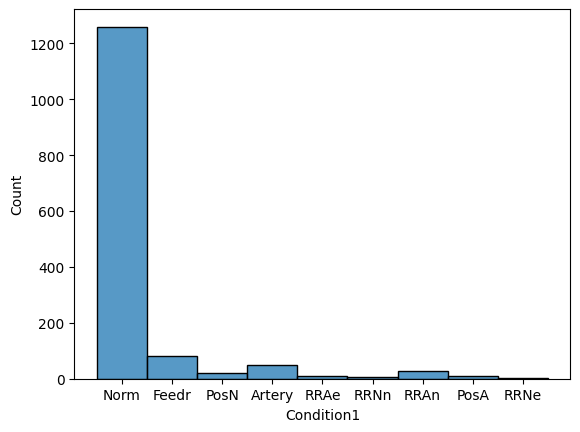



Condition2
count     1460
unique       8
top       Norm
freq      1445
Name: Condition2, dtype: object


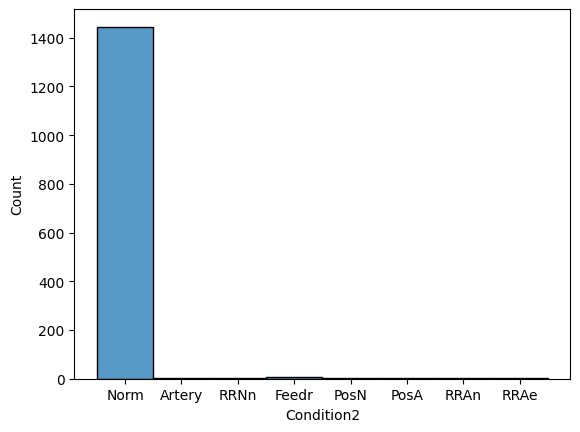



BldgType
count     1460
unique       5
top       1Fam
freq      1220
Name: BldgType, dtype: object


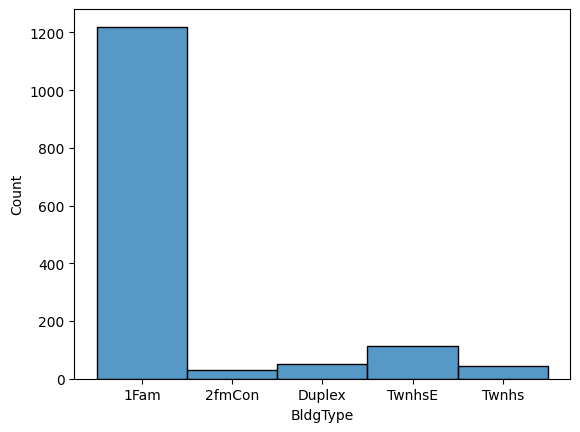



HouseStyle
count       1460
unique         8
top       1Story
freq         726
Name: HouseStyle, dtype: object


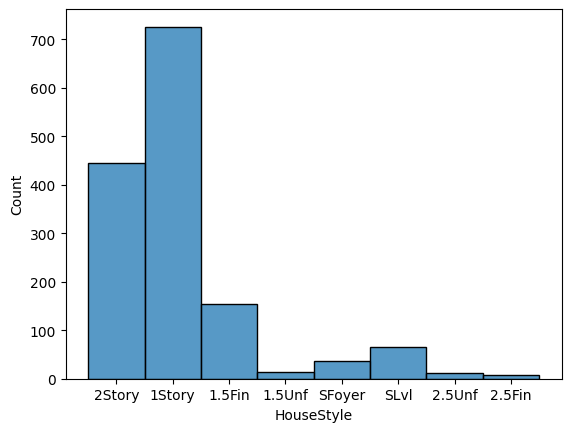



OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


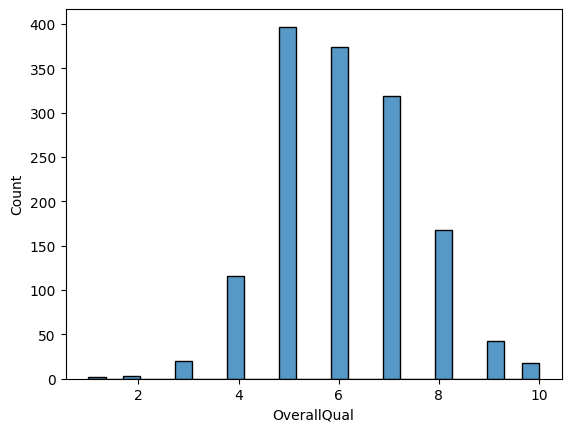



OverallCond
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


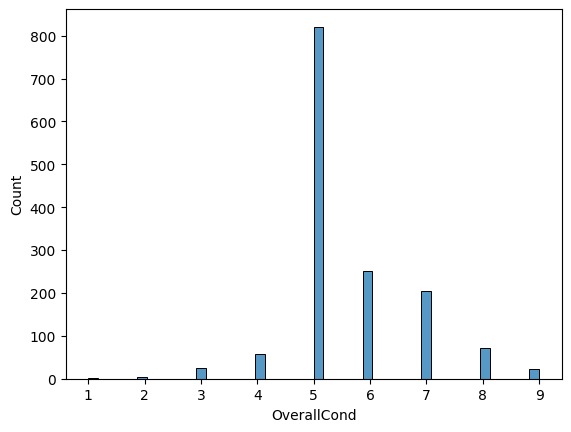



YearBuilt
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


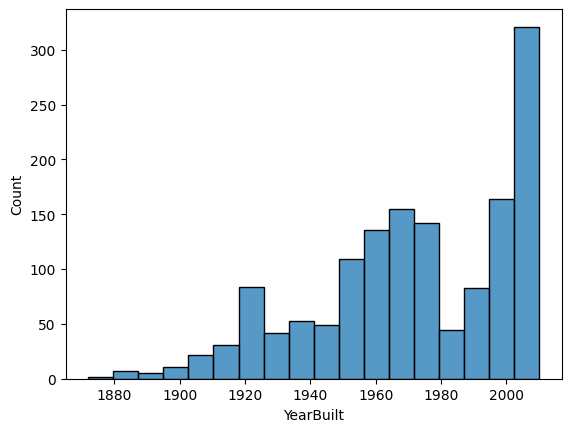



YearRemodAdd
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


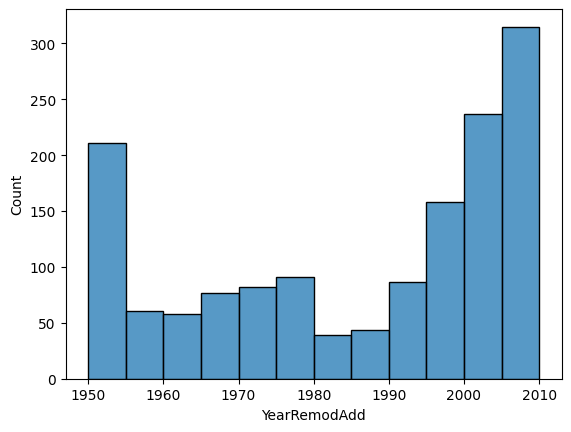



RoofStyle
count      1460
unique        6
top       Gable
freq       1141
Name: RoofStyle, dtype: object


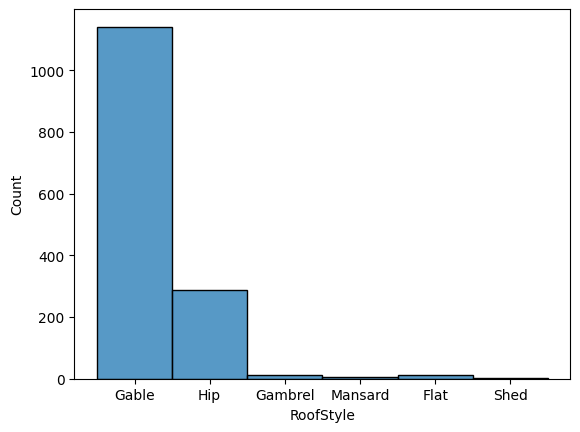



RoofMatl
count        1460
unique          8
top       CompShg
freq         1434
Name: RoofMatl, dtype: object


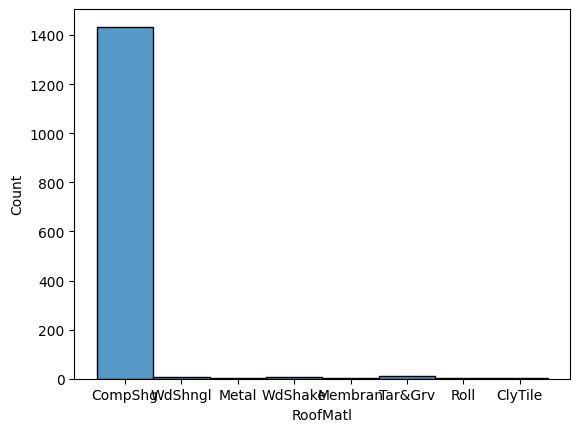



Exterior1st
count        1460
unique         15
top       VinylSd
freq          515
Name: Exterior1st, dtype: object


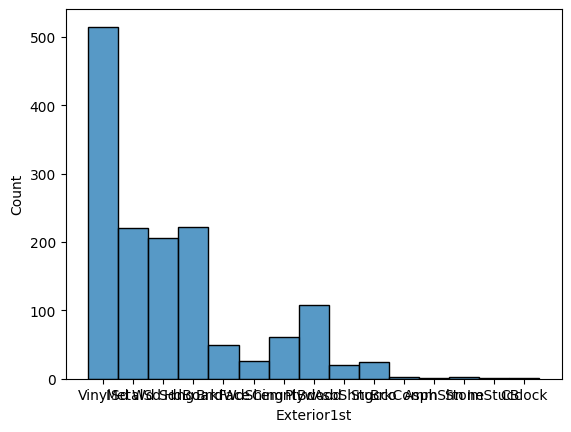



Exterior2nd
count        1460
unique         16
top       VinylSd
freq          504
Name: Exterior2nd, dtype: object


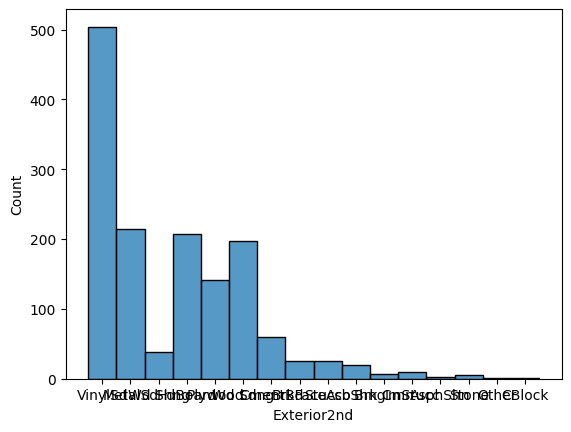



MasVnrType
count     1460
unique       4
top       None
freq       872
Name: MasVnrType, dtype: object


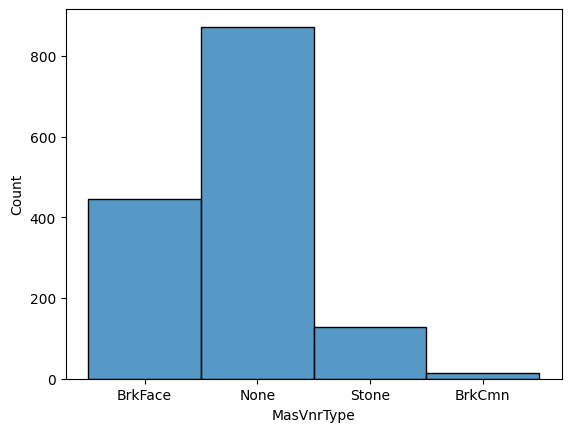



MasVnrArea
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


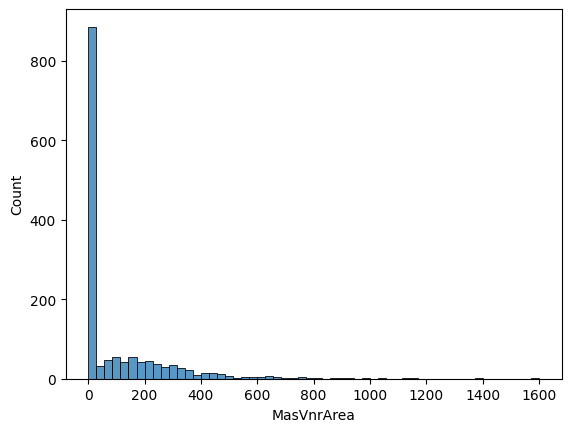



ExterQual
count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object


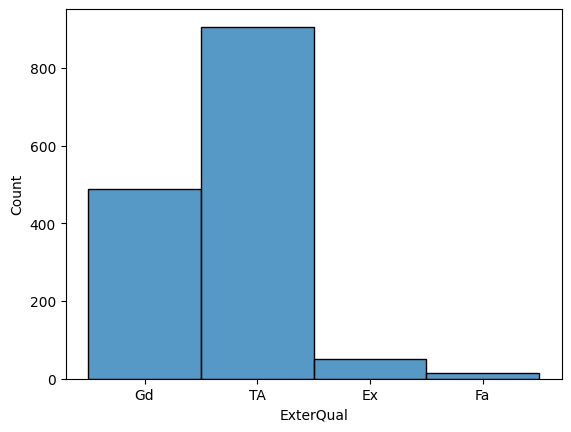



ExterCond
count     1460
unique       5
top         TA
freq      1282
Name: ExterCond, dtype: object


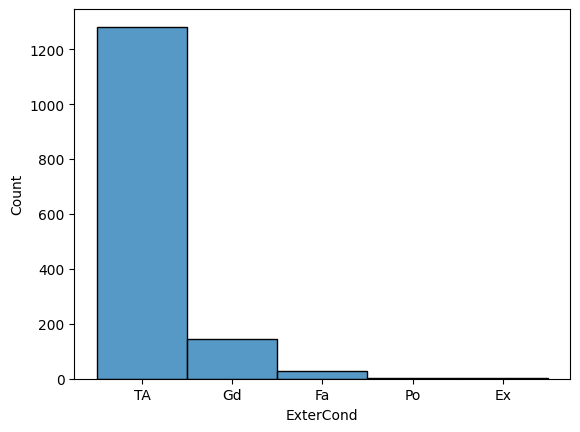



Foundation
count      1460
unique        6
top       PConc
freq        647
Name: Foundation, dtype: object


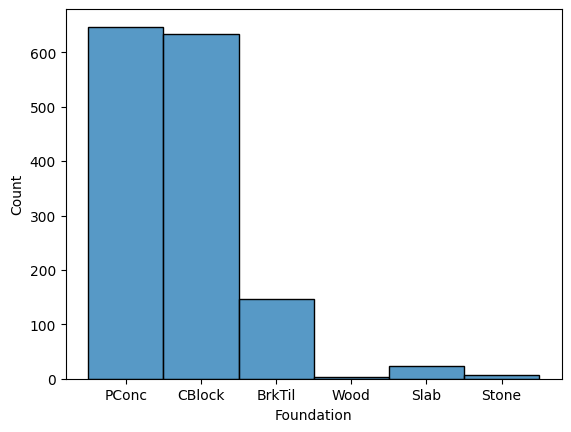



BsmtQual
count     1460
unique       5
top         TA
freq       649
Name: BsmtQual, dtype: object


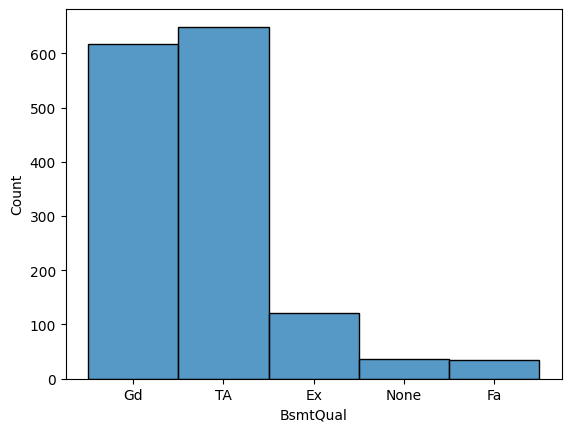



BsmtCond
count     1460
unique       5
top         TA
freq      1311
Name: BsmtCond, dtype: object


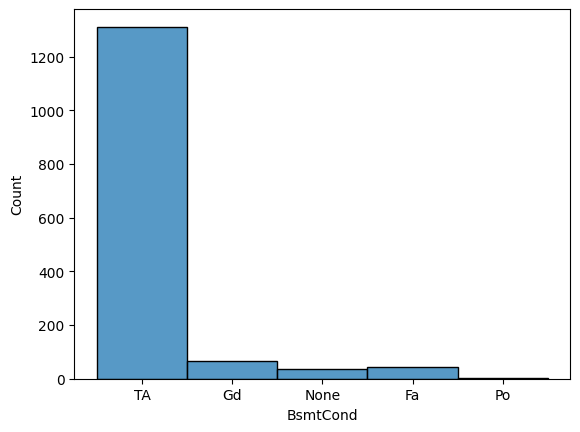



BsmtExposure
count     1460
unique       5
top         No
freq       953
Name: BsmtExposure, dtype: object


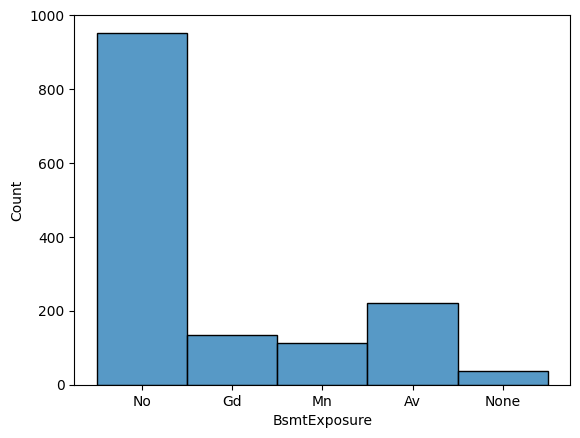



BsmtFinType1
count     1460
unique       7
top        Unf
freq       430
Name: BsmtFinType1, dtype: object


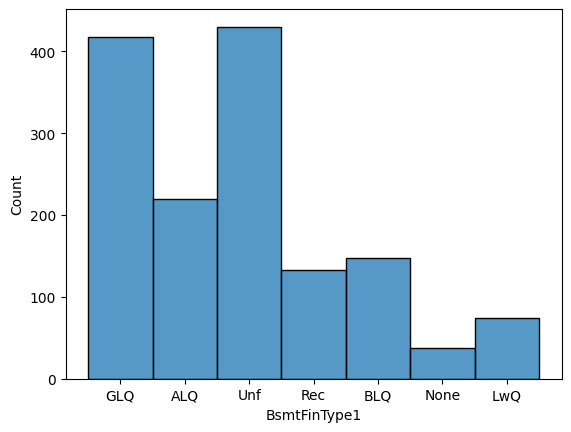



BsmtFinSF1
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


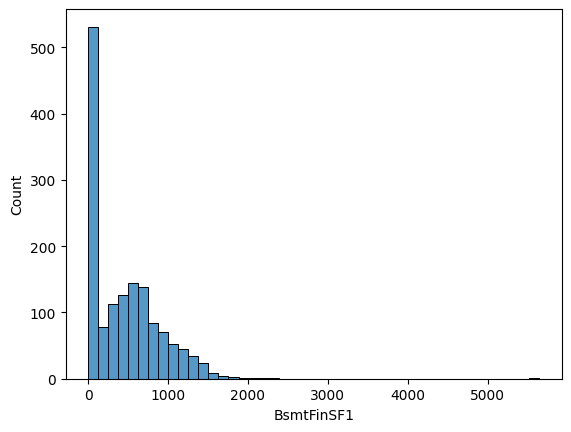



BsmtFinType2
count     1460
unique       7
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object


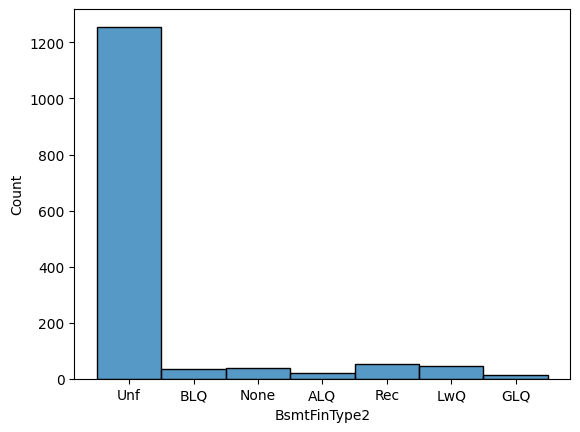



BsmtFinSF2
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


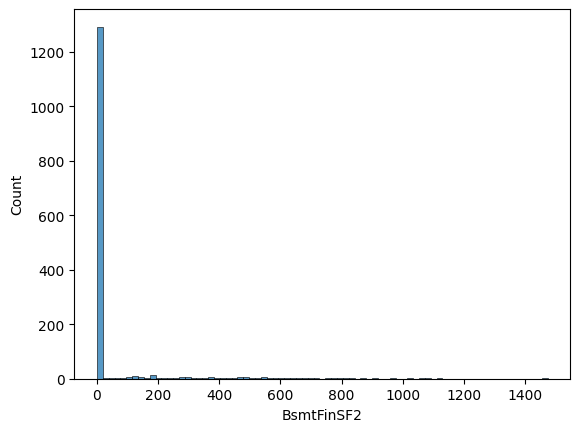



BsmtUnfSF
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


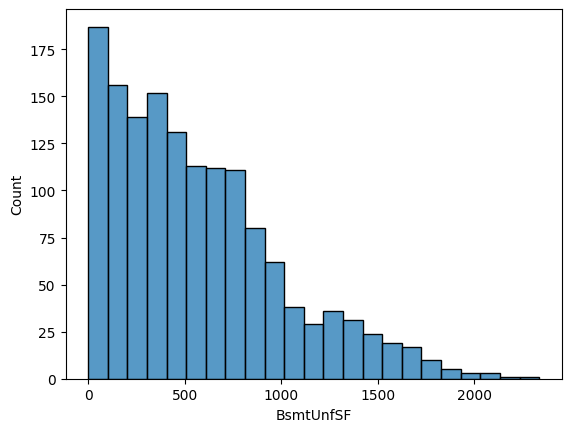



TotalBsmtSF
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


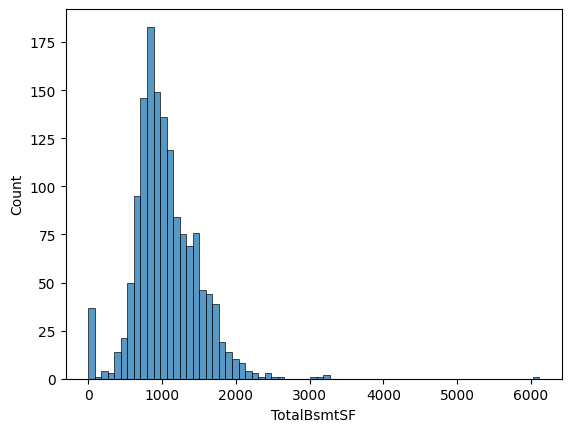



Heating
count     1460
unique       6
top       GasA
freq      1428
Name: Heating, dtype: object


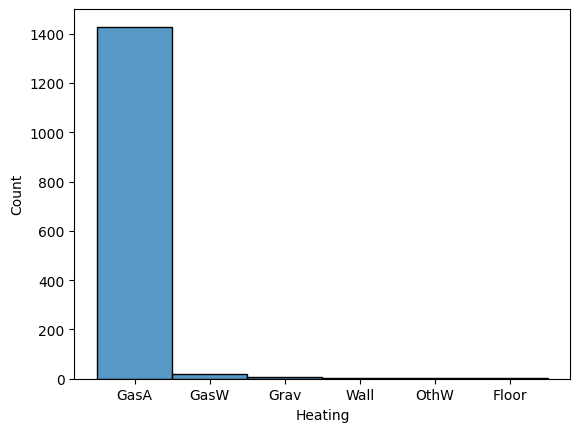



HeatingQC
count     1460
unique       5
top         Ex
freq       741
Name: HeatingQC, dtype: object


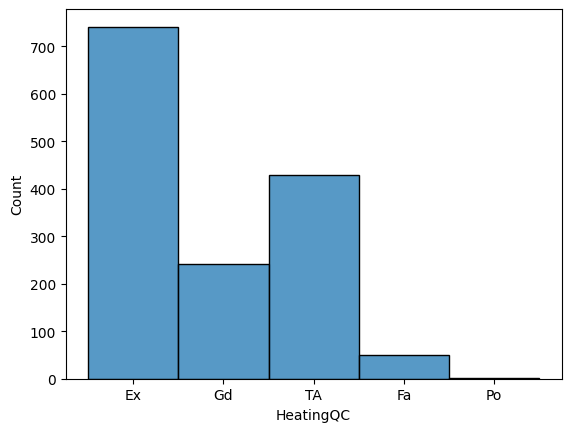



CentralAir
count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object


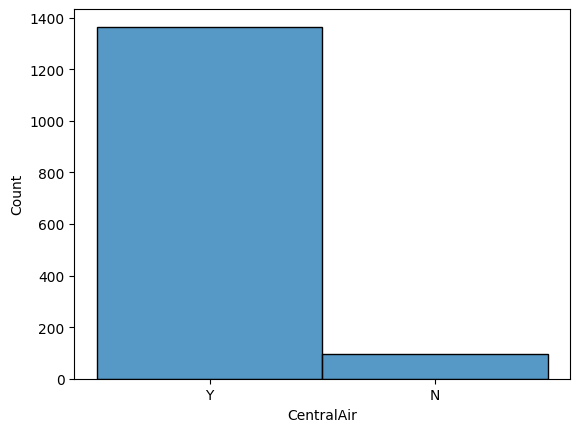



Electrical
count      1460
unique        5
top       SBrkr
freq       1335
Name: Electrical, dtype: object


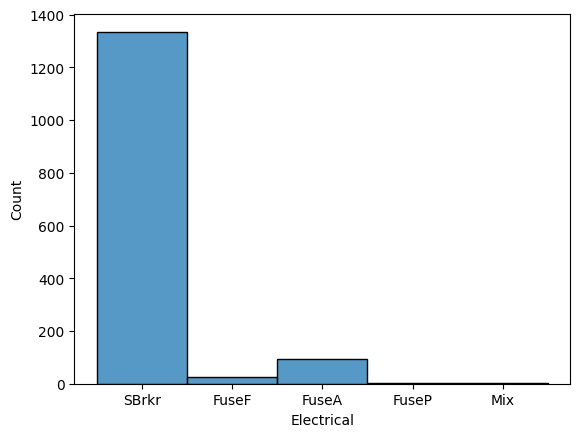



1stFlrSF
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


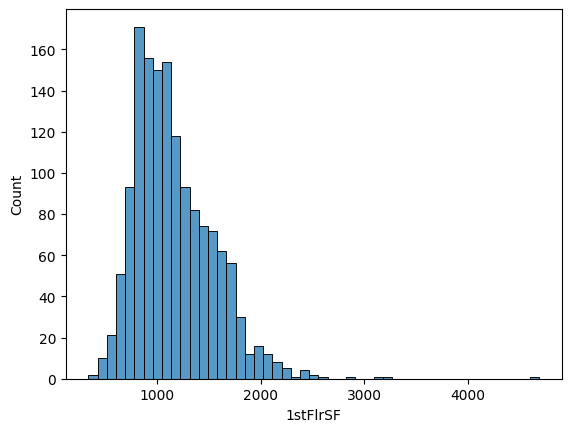



2ndFlrSF
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


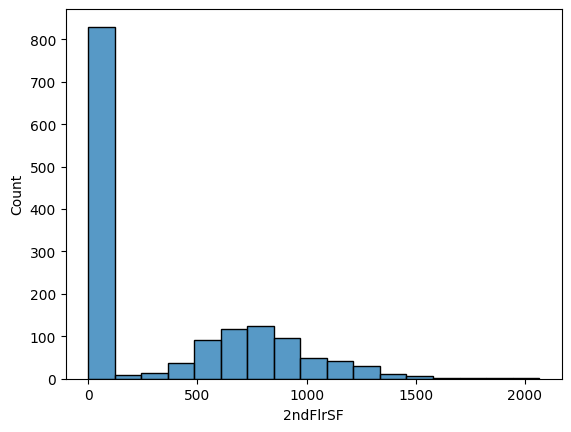



LowQualFinSF
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


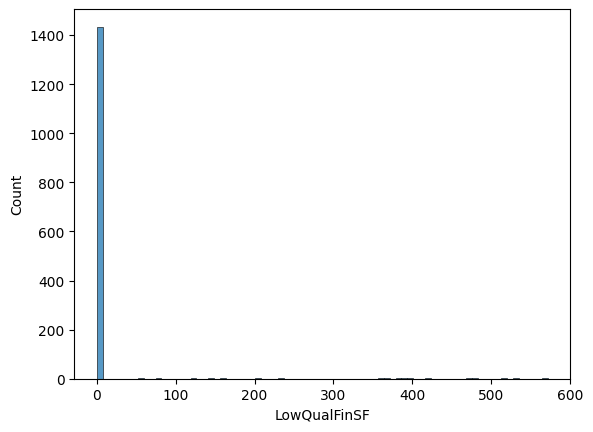



GrLivArea
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


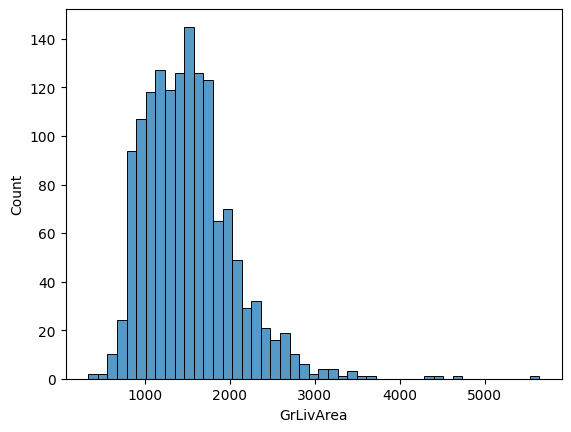



BsmtFullBath
count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


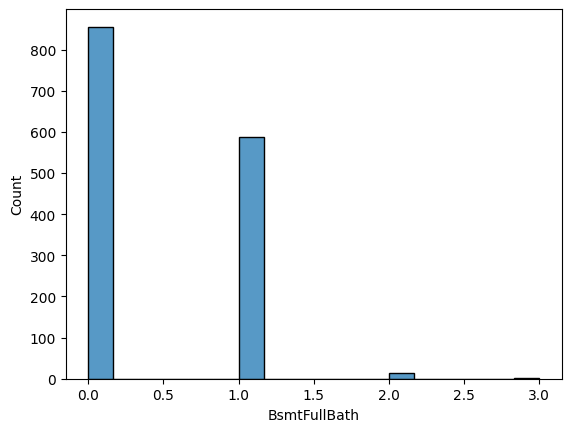



BsmtHalfBath
count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


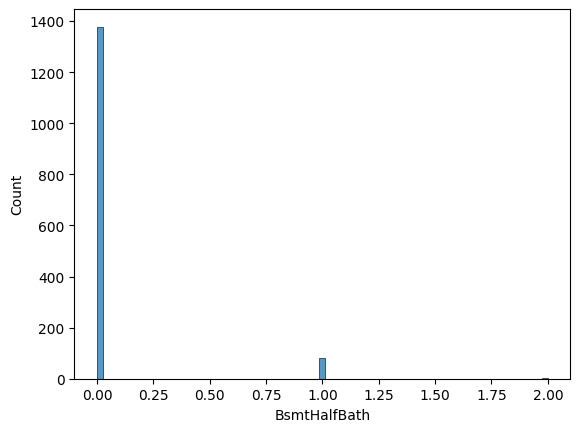



FullBath
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


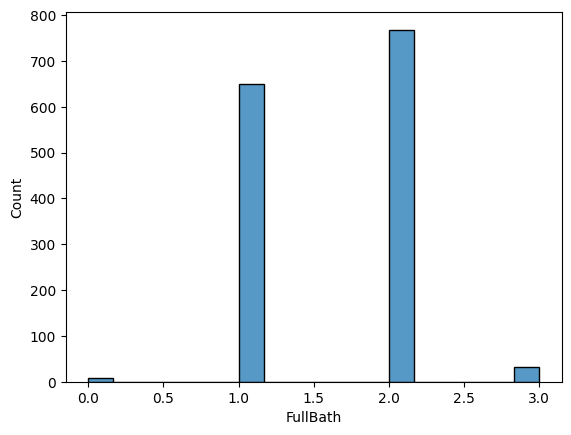



HalfBath
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


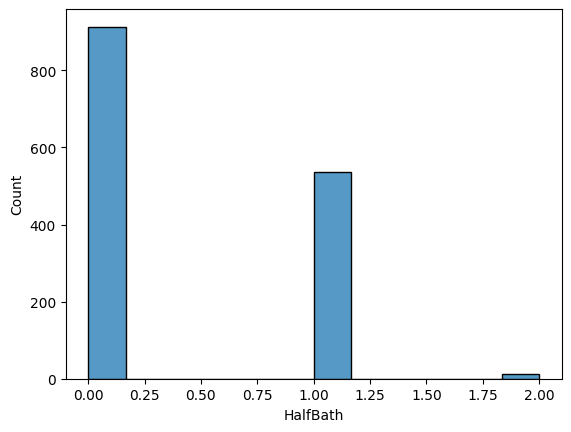



BedroomAbvGr
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


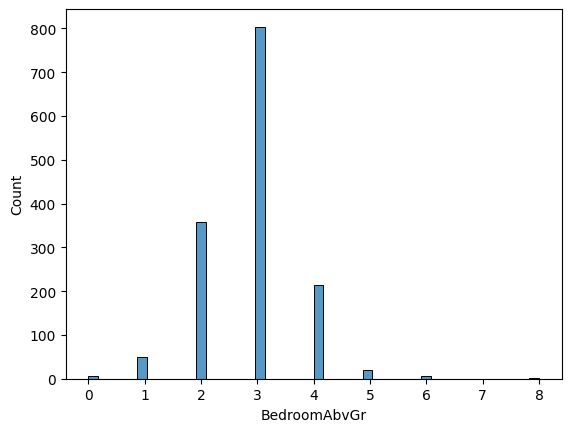



KitchenAbvGr
count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


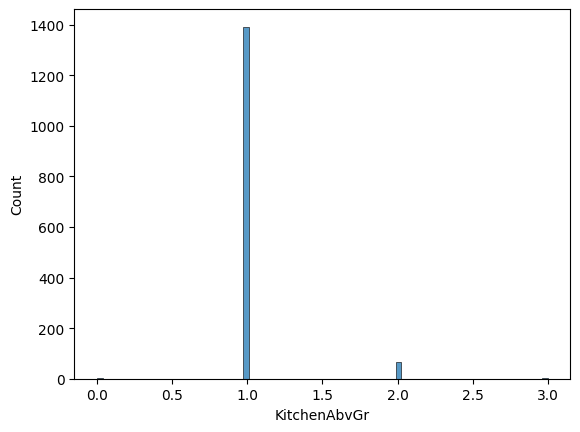



KitchenQual
count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object


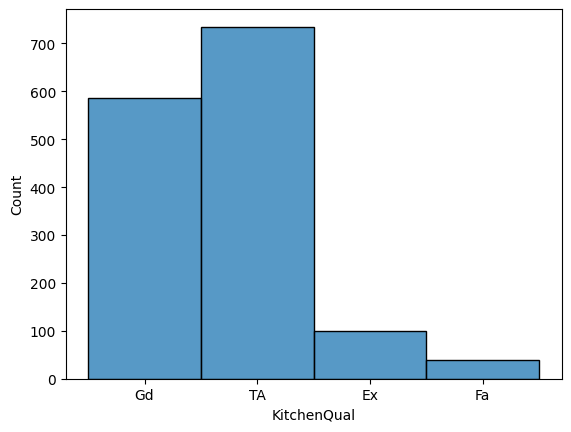



TotRmsAbvGrd
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


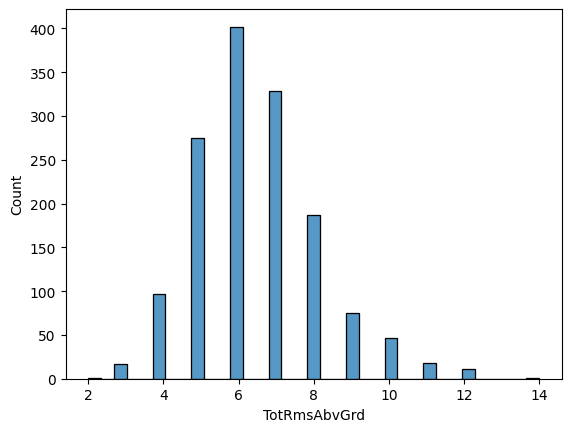



Functional
count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object


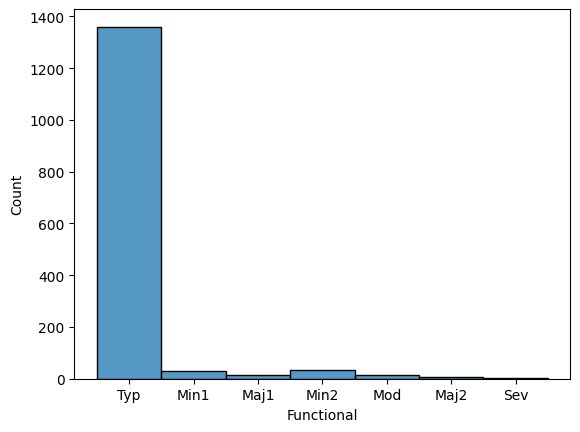



Fireplaces
count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


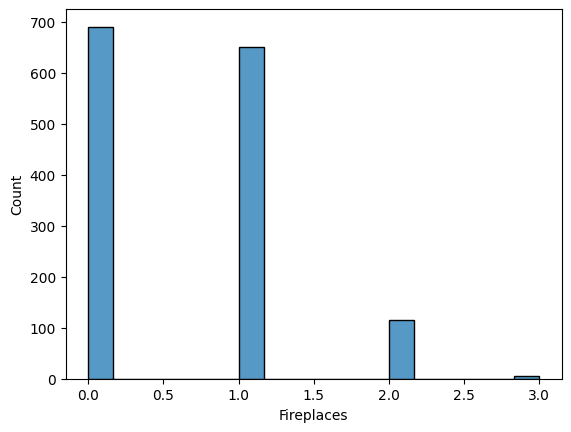



FireplaceQu
count     1460
unique       6
top       None
freq       690
Name: FireplaceQu, dtype: object


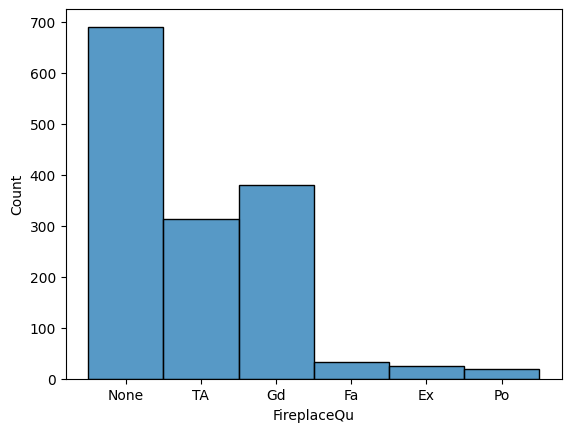



GarageType
count       1460
unique         7
top       Attchd
freq         870
Name: GarageType, dtype: object


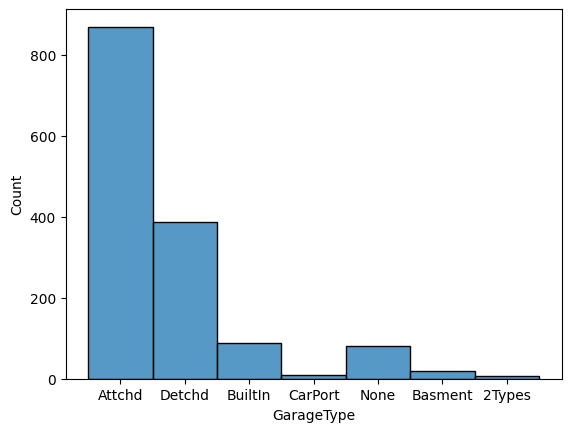



GarageYrBlt
count    1460.000000
mean     1868.739726
std       453.697295
min         0.000000
25%      1958.000000
50%      1977.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


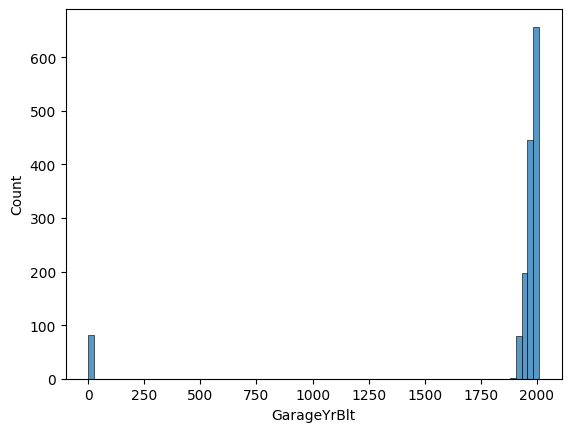



GarageFinish
count     1460
unique       4
top        Unf
freq       605
Name: GarageFinish, dtype: object


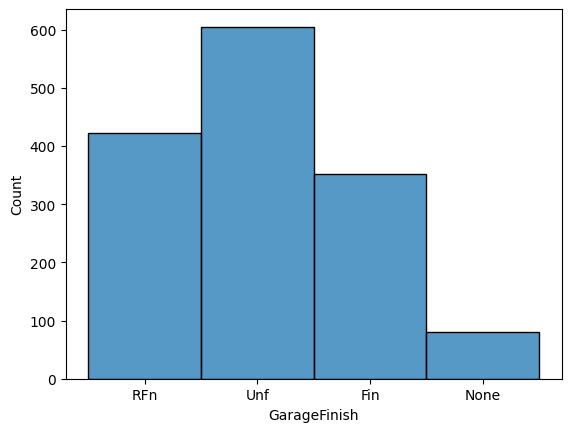



GarageCars
count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


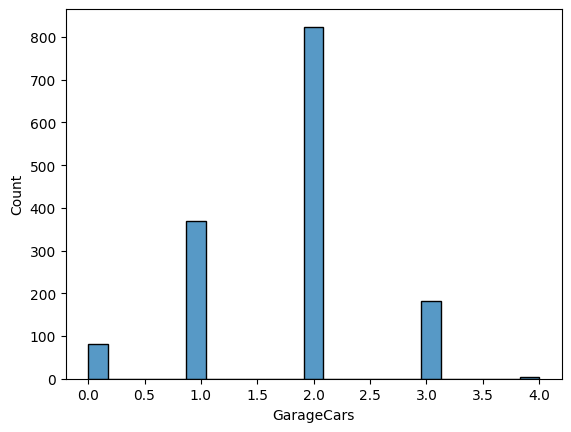



GarageArea
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


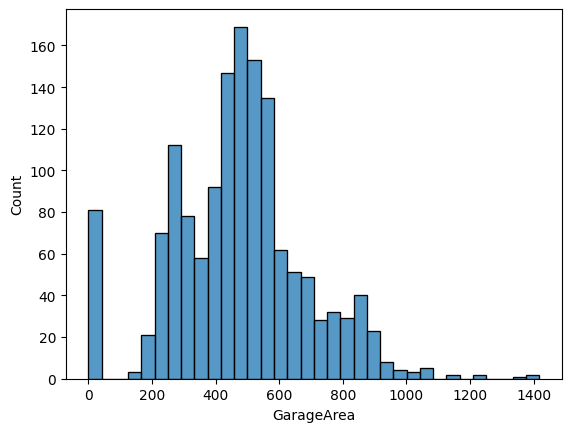



GarageQual
count     1460
unique       6
top         TA
freq      1311
Name: GarageQual, dtype: object


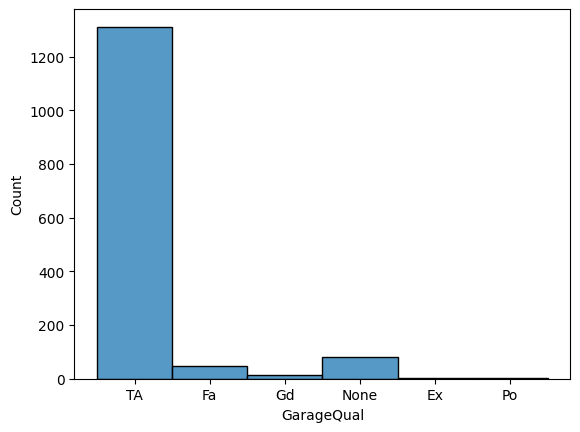



GarageCond
count     1460
unique       6
top         TA
freq      1326
Name: GarageCond, dtype: object


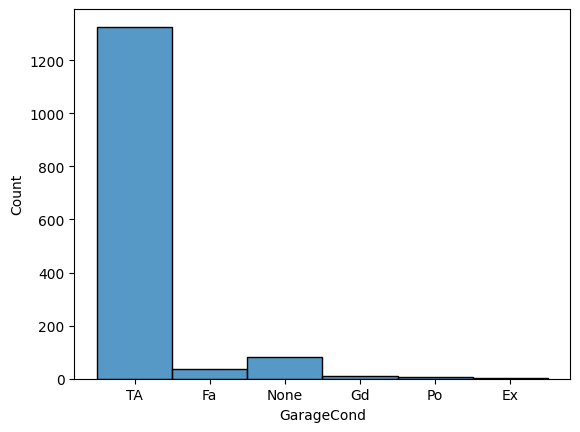



PavedDrive
count     1460
unique       3
top          Y
freq      1340
Name: PavedDrive, dtype: object


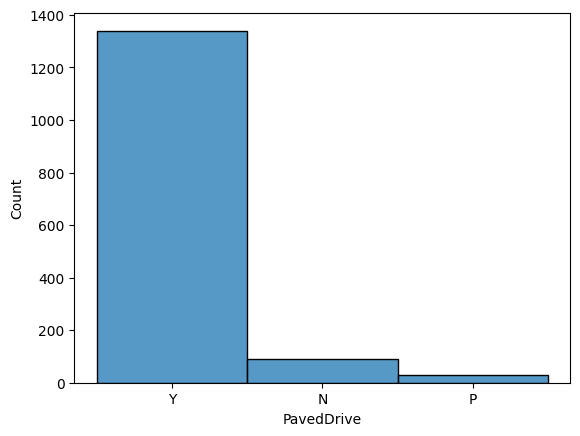



WoodDeckSF
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


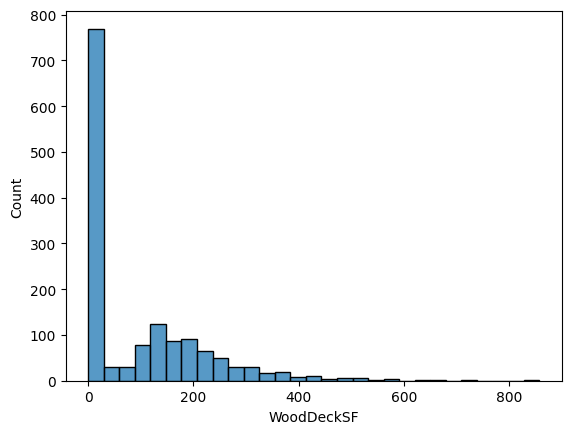



OpenPorchSF
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


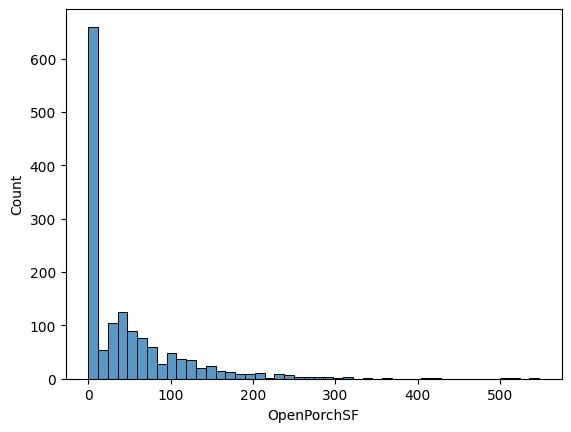



EnclosedPorch
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


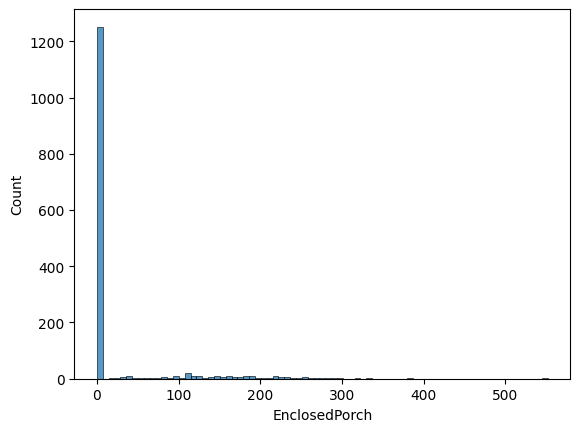



3SsnPorch
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


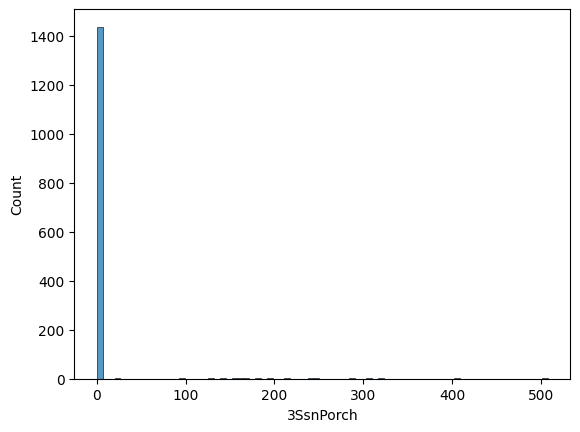



ScreenPorch
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


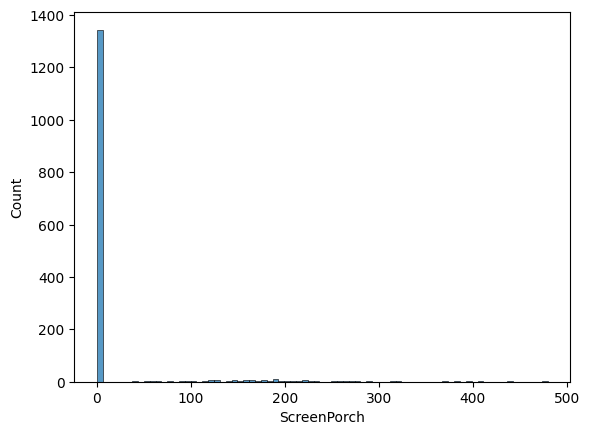



PoolArea
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


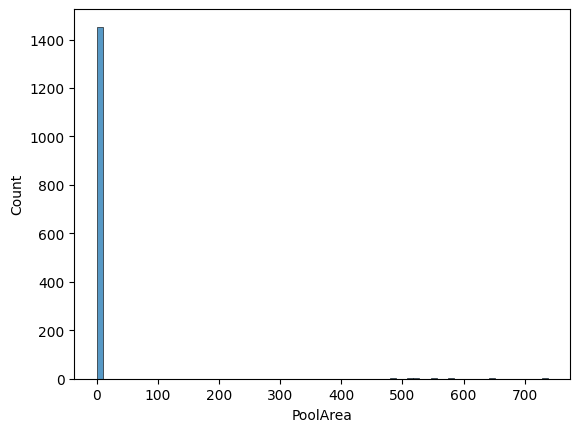



MiscVal
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


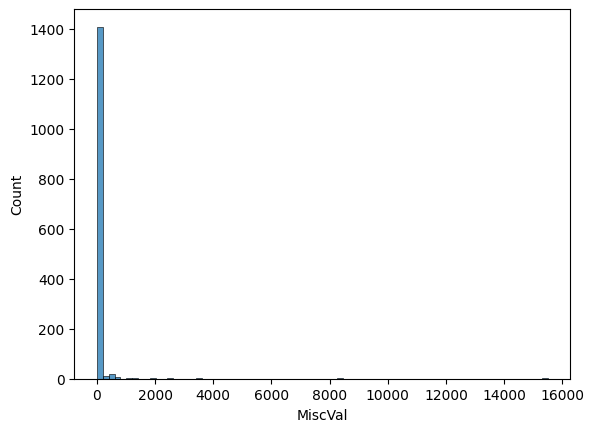



MoSold
count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64


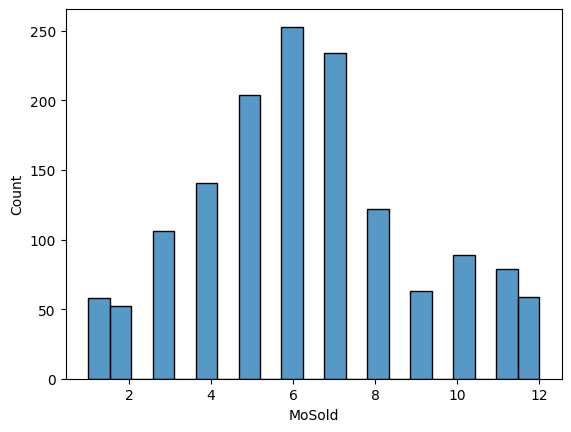



YrSold
count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64


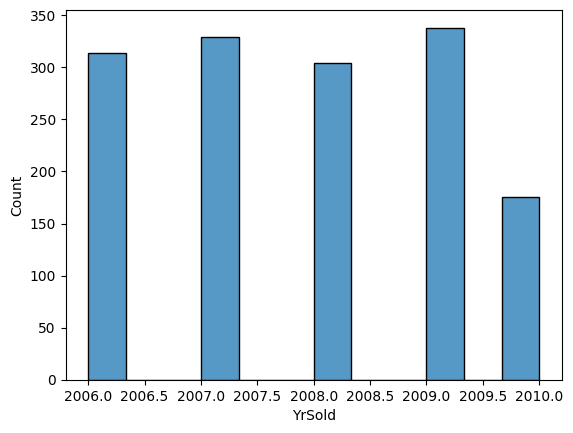



SaleType
count     1460
unique       9
top         WD
freq      1267
Name: SaleType, dtype: object


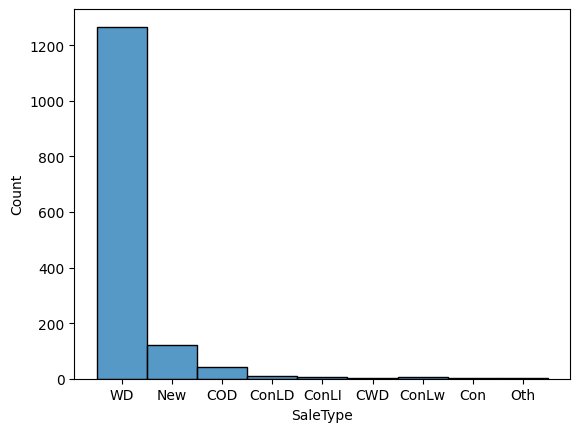



SaleCondition
count       1460
unique         6
top       Normal
freq        1198
Name: SaleCondition, dtype: object


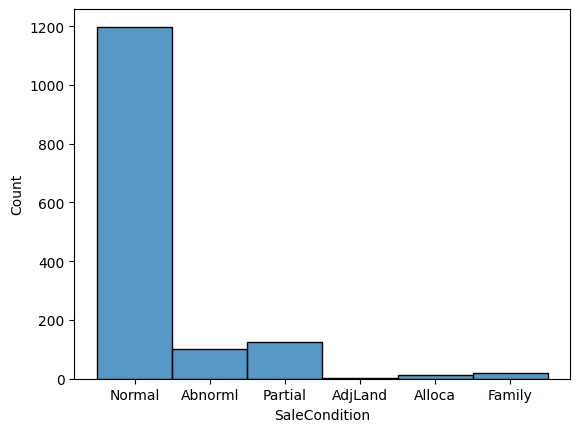



SalePrice
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


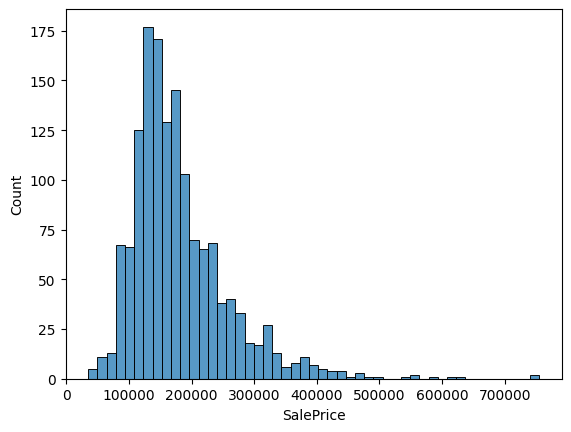



HasGarage
count    1460.000000
mean        0.944521
std         0.228992
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: HasGarage, dtype: float64


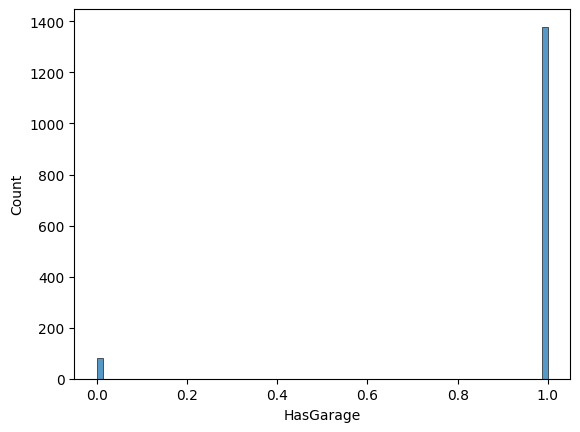



GarageYrBltMissing
count    1460.000000
mean        0.055479
std         0.228992
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: GarageYrBltMissing, dtype: float64


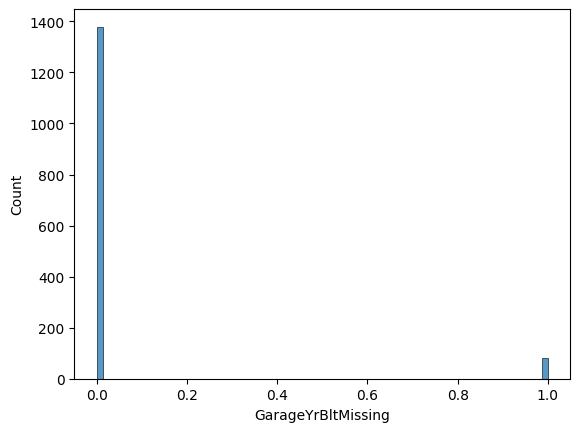



HasMasVnr
count    1460.000000
mean        0.402740
std         0.490617
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: HasMasVnr, dtype: float64


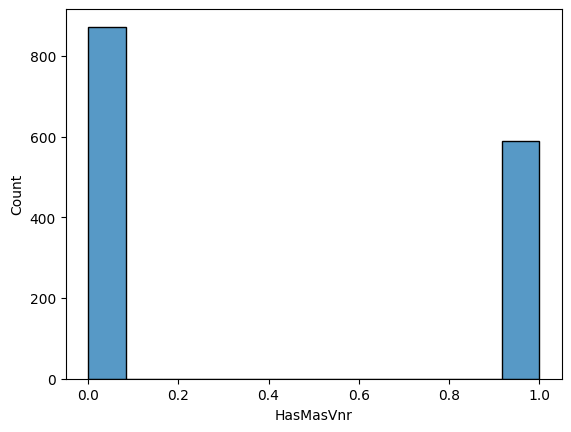

In [846]:
for col in df_train.columns:
    if col in skip_columns:
        continue
    print(col)
    print(df_train[col].describe())
    sns.histplot(df_train[col])
    plt.show()
    print("\n")

# Outliers Analysis

### Outliers Analysis - MSSubClass

In [847]:
Q1, Q3 = df_train['MSSubClass'].quantile(0.25), df_train['MSSubClass'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {Lower_bound}")
print(f"Upper bound: {Upper_bound}")

# Show Outliers
outliers = df_train[(df_train['MSSubClass'] < Lower_bound) | (df_train['MSSubClass'] > Upper_bound)]
outliers

Lower bound: -55.0
Upper bound: 145.0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasGarage,GarageYrBltMissing,HasMasVnr
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000,1,0,0
48,49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,None,None,0.0,None,0,0,None,None,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000,0,1,0
56,57,160,FV,24.0,2645,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,8,5,1999,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,456.0,Gd,TA,PConc,Gd,TA,No,GLQ,649,Unf,0,321,970,GasA,Ex,Y,SBrkr,983,756,0,1739,1,0,2,1,3,1,Gd,7,Typ,0,None,Attchd,1999.0,Fin,2,480,TA,TA,Y,115,0,0,0,0,0,0,8,2009,WD,Abnorml,172500,1,0,1
75,76,180,RM,21.0,1596,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SLvl,4,5,1973,1973,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,462,Unf,0,0,462,GasA,TA,Y,SBrkr,526,462,0,988,1,0,1,0,2,1,TA,5,Typ,0,None,BuiltIn,1973.0,Unf,1,297,TA,TA,Y,120,101,0,0,0,0,0,11,2009,WD,Normal,91000,1,0,0
87,88,160,FV,40.0,3951,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,Stone,76.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,612,612,GasA,Ex,Y,SBrkr,612,612,0,1224,0,0,2,1,2,1,Gd,4,Typ,0,None,Detchd,2009.0,RFn,2,528,TA,TA,Y,0,234,0,0,0,0,0,6,2009,New,Partial,164500,1,0,1
93,94,190,C (all),60.0,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,6,1910,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Rec,1046,Unf,0,168,1214,GasW,Ex,N,SBrkr,1260,1031,0,2291,0,1,2,0,4,2,TA,9,Typ,1,Gd,Detchd,1900.0,Unf,2,506,TA,TA,Y,0,0,0,0,99,0,0,11,2007,WD,Normal,133900,1,0,0
115,116,160,FV,34.0,3230,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,1999,1999,Gable,CompShg,MetalSd,MetalSd,BrkFace,1129.0,TA,TA,PConc,Gd,TA,No,GLQ,419,Unf,0,310,729,GasA,Gd,Y,SBrkr,729,729,0,1458,0,0,2,1,2,1,TA,5,Typ,1,Fa,Detchd,1999.0,Unf,2,440,TA,TA,Y,0,32,0,0,0,0,0,6,2007,WD,Normal,176000,1,0,1
125,126,190,RM,60.0,6780,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,None,None,0.0,None,0,0,None,None,N,53,0,0,0,0,0,0,6,2006,WD,Normal,84500,0,1,0
145,146,160,RM,24.0,2522,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,6,5,2004,2006,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,970,970,GasA,Ex,Y,SBrkr,970,739,0,1709,0,0,2,0,3,1,Gd,7,Maj1,0,None,Detchd,2004.0,Unf,2,380,TA,TA,Y,0,40,0,0,0,0,0,4,2006,WD,Normal,130000,1,0,1
165,166,190,RL,62.0,10106,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,2fmCon,1.5Fin,5,7,1940,1999,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,ALQ,351,Rec,181,112,644,GasA,Gd,Y,SBrkr,808,547,0,1355,1,0,2,0,4,2,TA,6,Typ,0,None,None,0.

<Axes: >

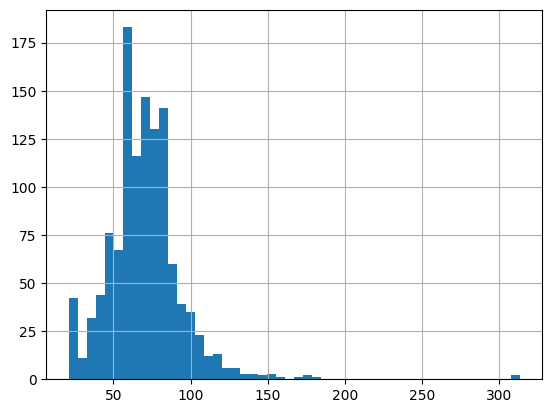

In [848]:
df_train["LotFrontage"].hist(bins=50)

In [849]:
column = "LotFrontage"
Q1, Q3 = df_train[column].quantile(0.25), df_train[column].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {Lower_bound}")
print(f"Upper bound: {Upper_bound}")

outliers = df_train[(df_train[column] < Lower_bound) | (df_train[column] > Upper_bound)]
outliers

Lower bound: 27.5
Upper bound: 111.5


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasGarage,GarageYrBltMissing,HasMasVnr
36,37,20,RL,112.0,10859,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1097,1097,GasA,Ex,Y,SBrkr,1097,0,0,1097,0,0,1,1,3,1,TA,6,Typ,0,None,Attchd,1995.0,Unf,2,672,TA,TA,Y,392,64,0,0,0,0,0,6,2009,WD,Normal,145000,1,0,0
41,42,20,RL,115.0,16905,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,5,6,1959,1959,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,Gd,BLQ,967,Unf,0,383,1350,GasA,Gd,Y,SBrkr,1328,0,0,1328,0,1,1,1,2,1,TA,5,Typ,2,Gd,Attchd,1959.0,RFn,1,308,TA,TA,P,0,104,0,0,0,0,0,7,2007,WD,Normal,170000,1,0,0
56,57,160,FV,24.0,2645,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,8,5,1999,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,456.0,Gd,TA,PConc,Gd,TA,No,GLQ,649,Unf,0,321,970,GasA,Ex,Y,SBrkr,983,756,0,1739,1,0,2,1,3,1,Gd,7,Typ,0,None,Attchd,1999.0,Fin,2,480,TA,TA,Y,115,0,0,0,0,0,0,8,2009,WD,Abnorml,172500,1,0,1
75,76,180,RM,21.0,1596,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SLvl,4,5,1973,1973,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,462,Unf,0,0,462,GasA,TA,Y,SBrkr,526,462,0,988,1,0,1,0,2,1,TA,5,Typ,0,None,BuiltIn,1973.0,Unf,1,297,TA,TA,Y,120,101,0,0,0,0,0,11,2009,WD,Normal,91000,1,0,0
85,86,60,RL,121.0,16059,Pave,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991,1992,Hip,CompShg,HdBoard,HdBoard,BrkFace,284.0,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1288,1288,GasA,Ex,Y,SBrkr,1301,1116,0,2417,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1991.0,Unf,2,462,TA,TA,Y,127,82,0,0,0,0,0,4,2006,WD,Normal,260000,1,0,1
86,87,60,RL,122.0,11911,Pave,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,684,684,GasA,Ex,Y,SBrkr,684,876,0,1560,0,0,2,1,3,1,Gd,6,Typ,1,Gd,BuiltIn,2005.0,Fin,2,400,TA,TA,Y,100,38,0,0,0,0,0,3,2009,WD,Normal,174000,1,0,0
145,146,160,RM,24.0,2522,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,6,5,2004,2006,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,970,970,GasA,Ex,Y,SBrkr,970,739,0,1709,0,0,2,0,3,1,Gd,7,Maj1,0,None,Detchd,2004.0,Unf,2,380,TA,TA,Y,0,40,0,0,0,0,0,4,2006,WD,Normal,130000,1,0,1
150,151,20,RL,120.0,10356,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,716,Unf,0,253,969,GasA,TA,Y,SBrkr,969,0,0,969,0,0,1,1,3,1,TA,5,Typ,0,None,Attchd,1975.0,Unf,2,440,TA,TA,Y,0,0,0,0,0,0,0,1,2007,WD,Normal,122000,1,0,0
159,160,60,RL,134.0,19378,Pave,IR1,HLS,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,456.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,57,Unf,0,1335,1392,GasA,Ex,Y,SBrkr,1392,1070,0,2462,1,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,2006.0,RFn,2,576,TA,TA,Y,239,132,0,168,0,0,0,3,2006,New,Partial,320000,1,0,1
171,172,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639,Unf,0,441,1080,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,

MSSubClass


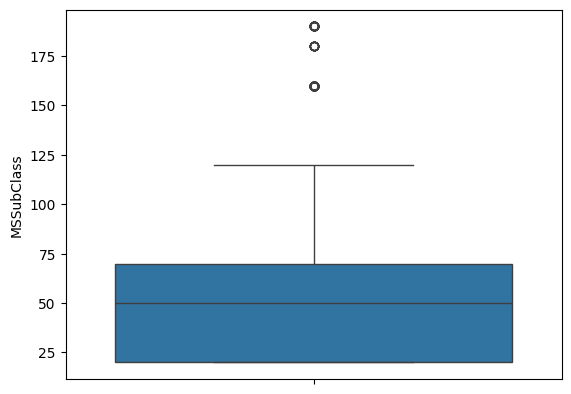

LotFrontage


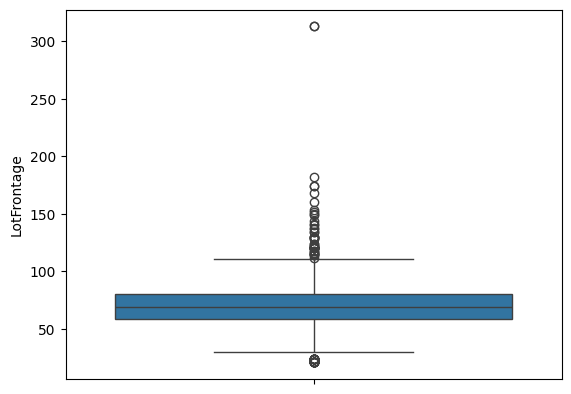

LotArea


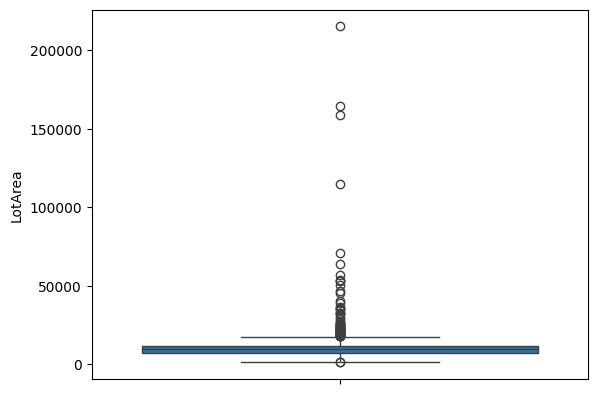

OverallQual


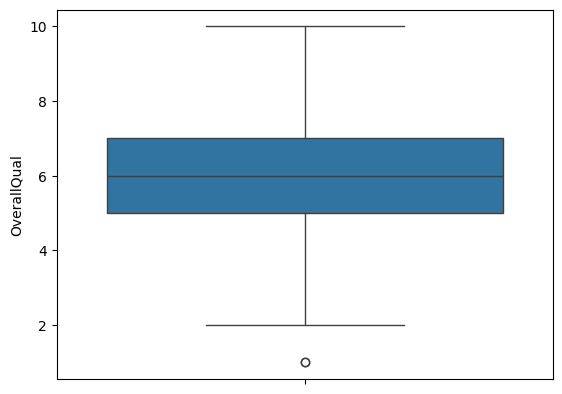

OverallCond


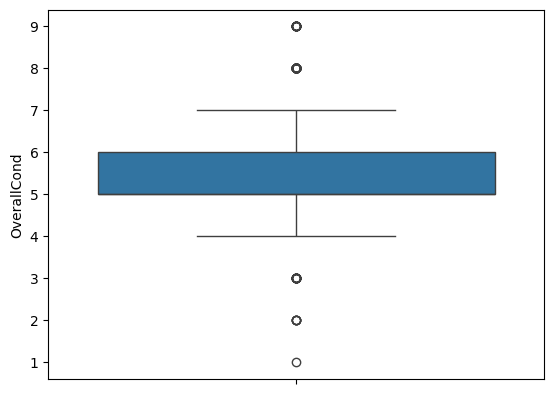

YearBuilt


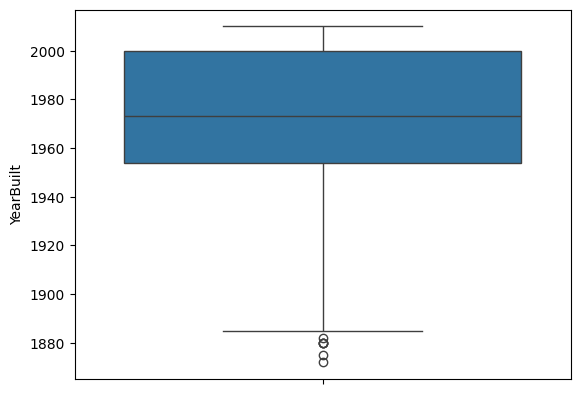

YearRemodAdd


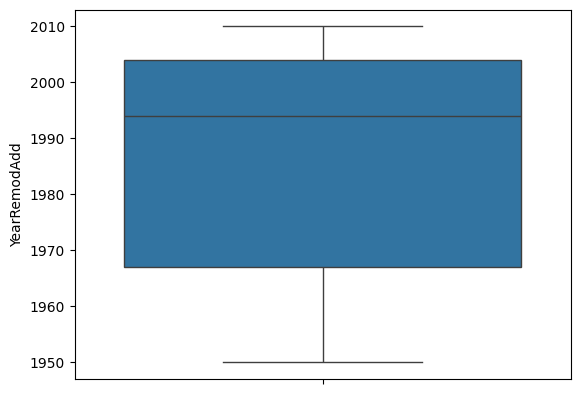

MasVnrArea


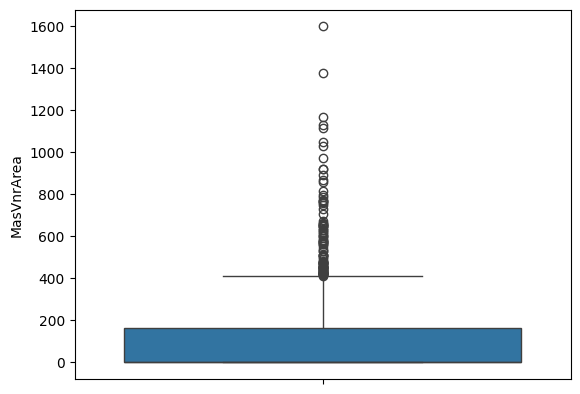

BsmtFinSF1


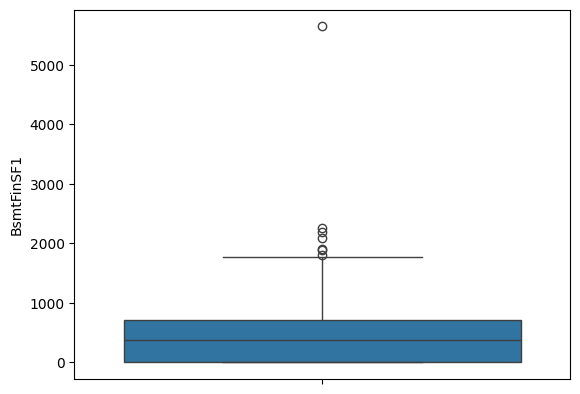

BsmtFinSF2


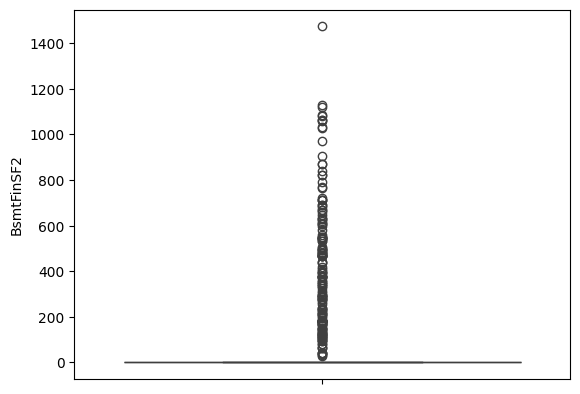

BsmtUnfSF


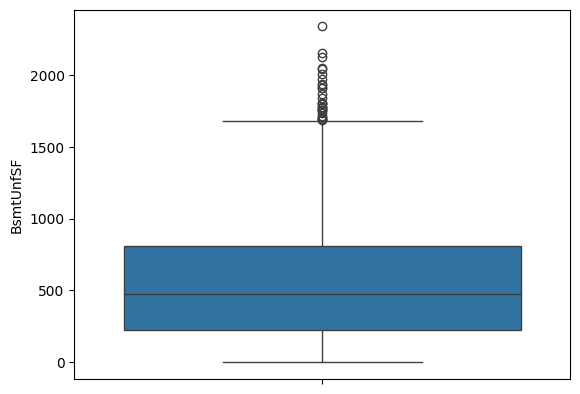

TotalBsmtSF


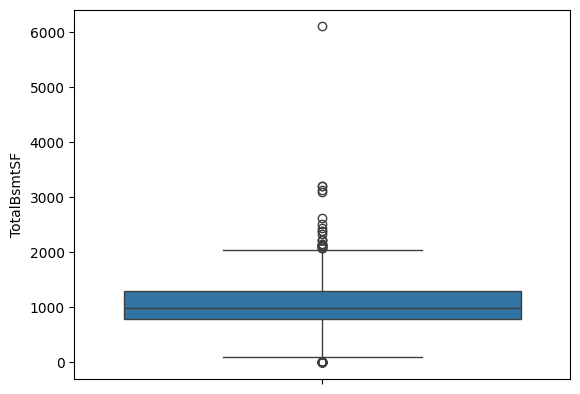

1stFlrSF


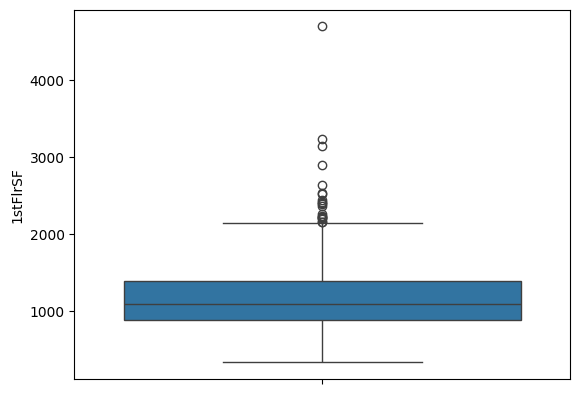

2ndFlrSF


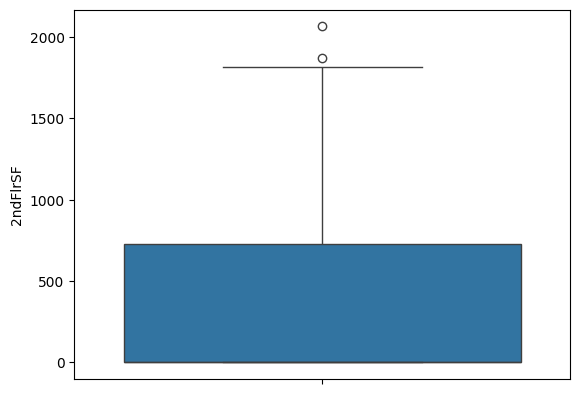

LowQualFinSF


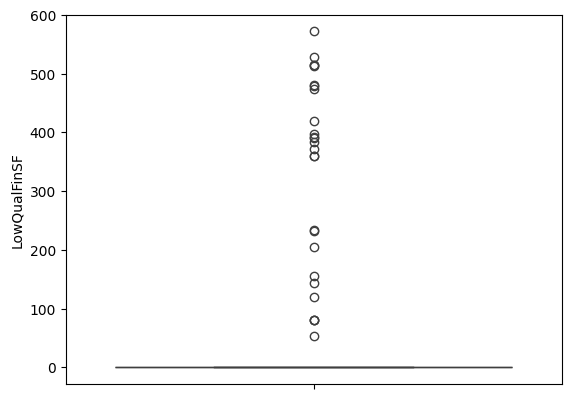

GrLivArea


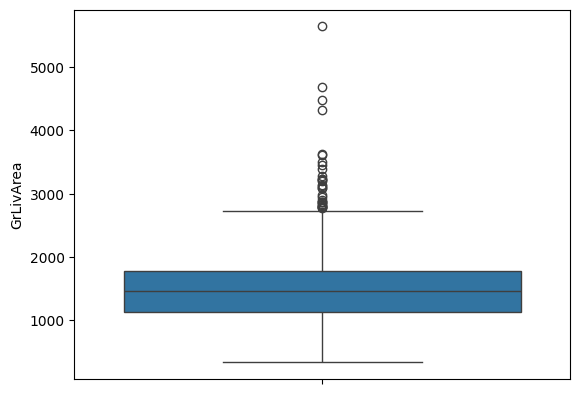

BsmtFullBath


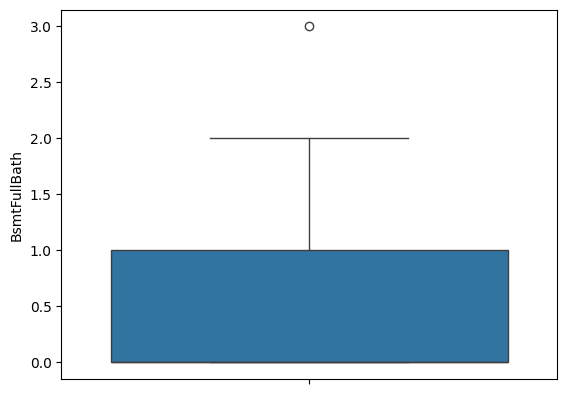

BsmtHalfBath


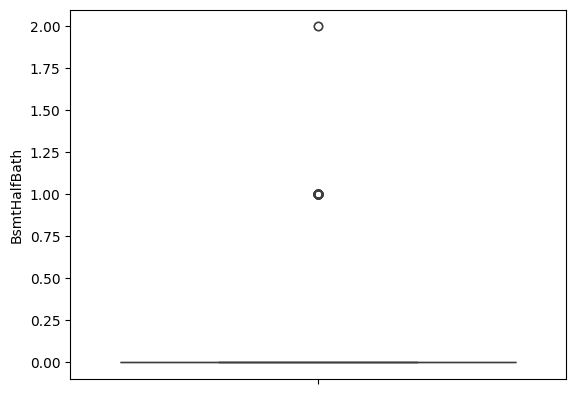

FullBath


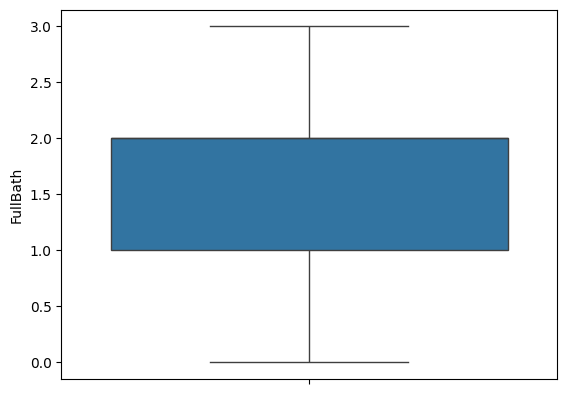

HalfBath


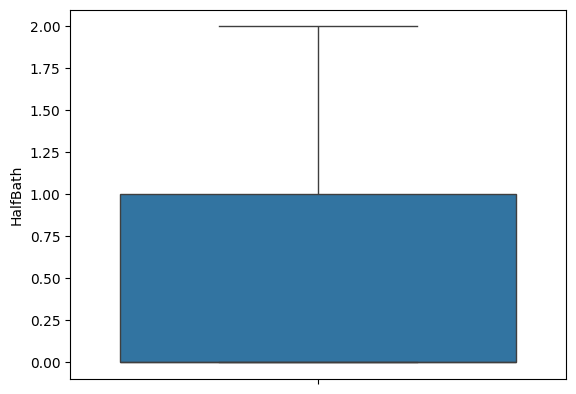

BedroomAbvGr


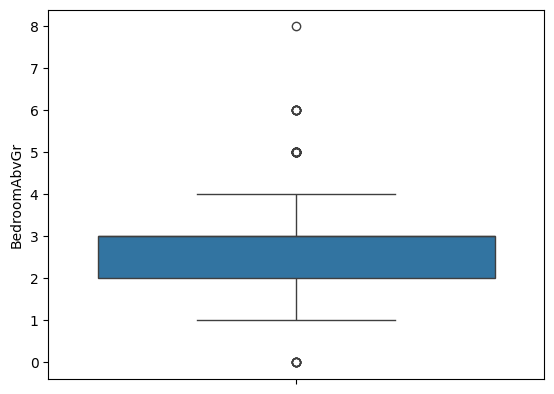

KitchenAbvGr


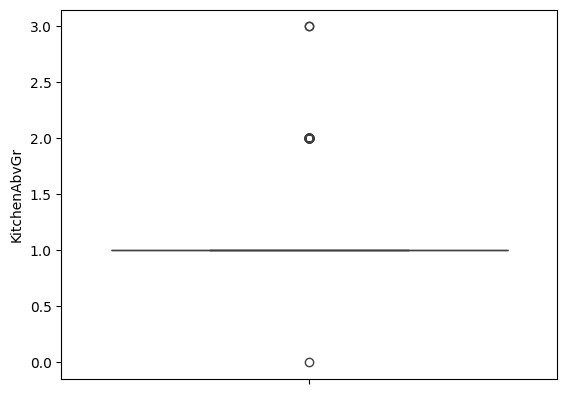

TotRmsAbvGrd


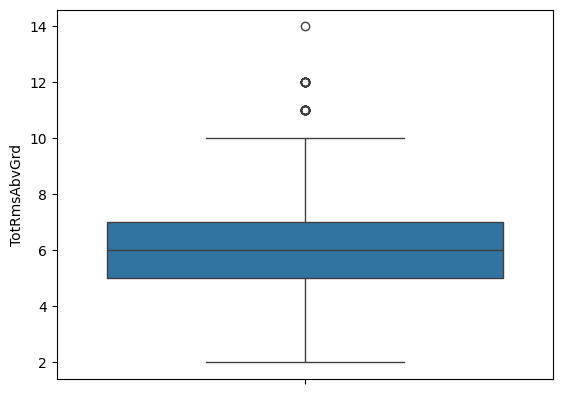

Fireplaces


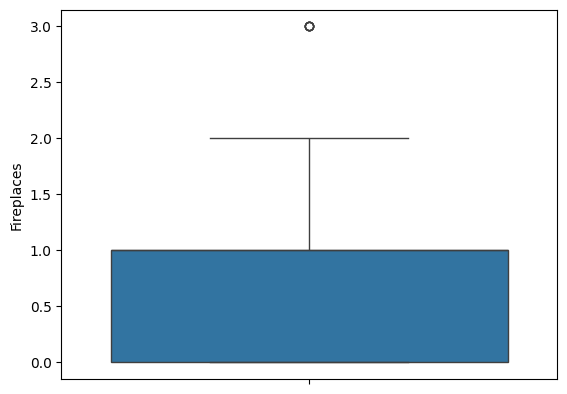

GarageYrBlt


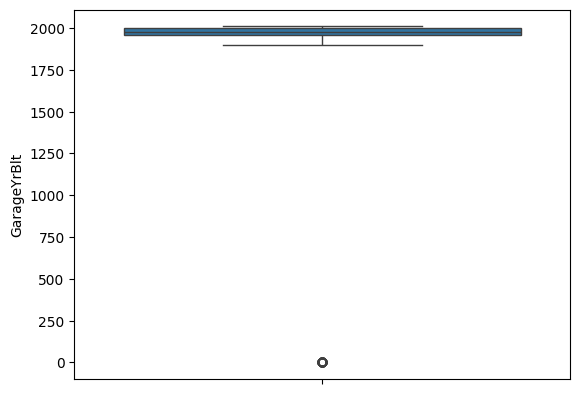

GarageCars


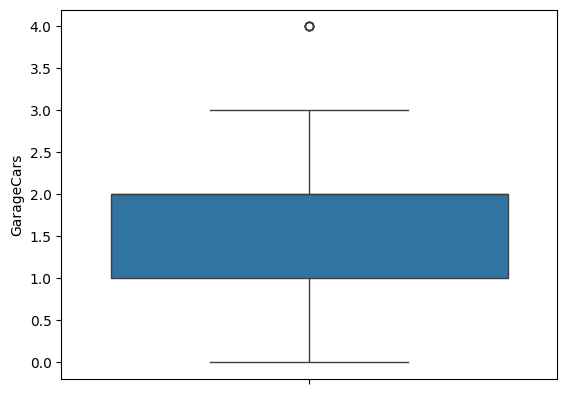

GarageArea


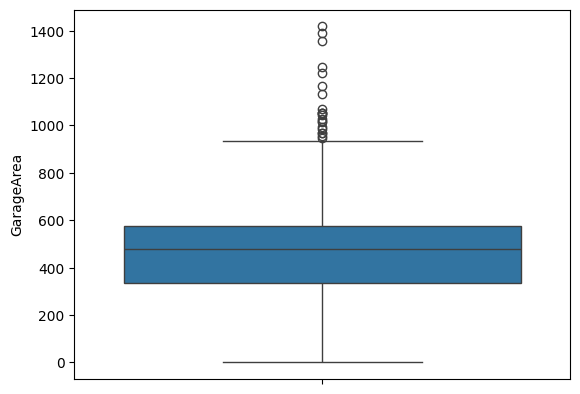

WoodDeckSF


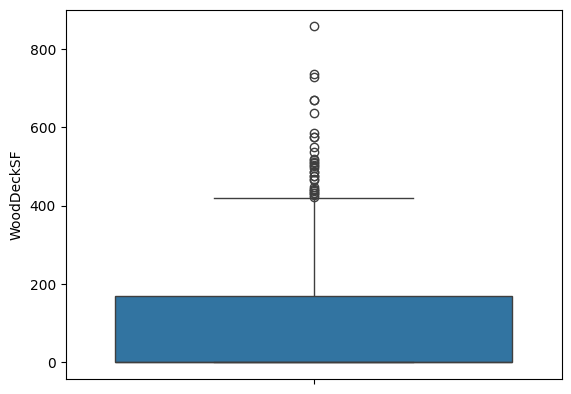

OpenPorchSF


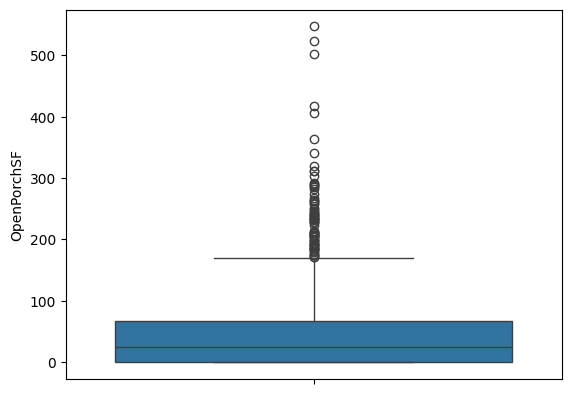

EnclosedPorch


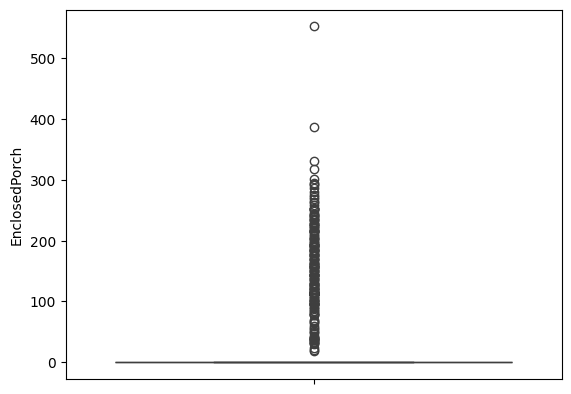

3SsnPorch


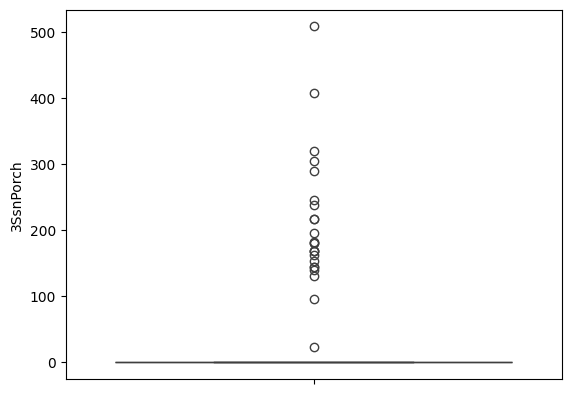

ScreenPorch


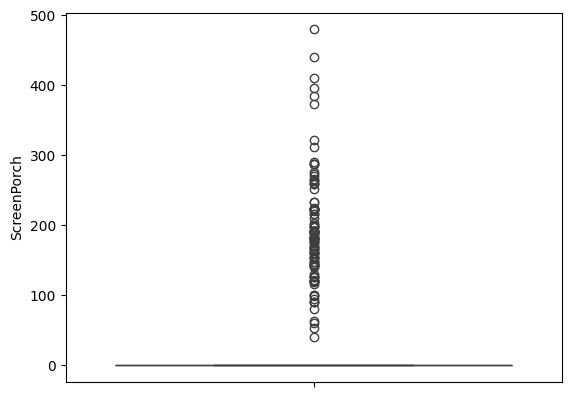

PoolArea


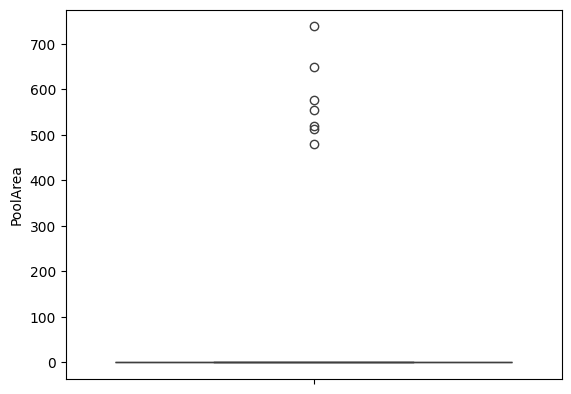

MiscVal


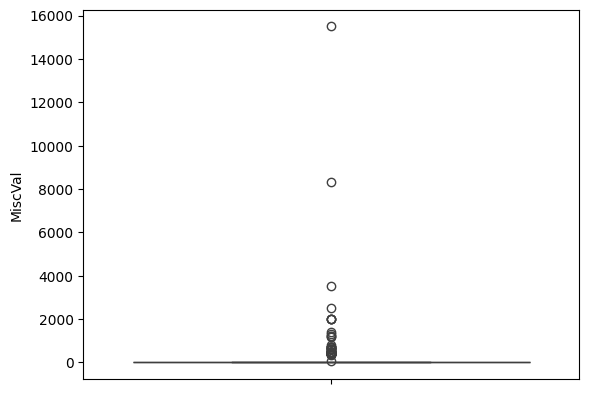

MoSold


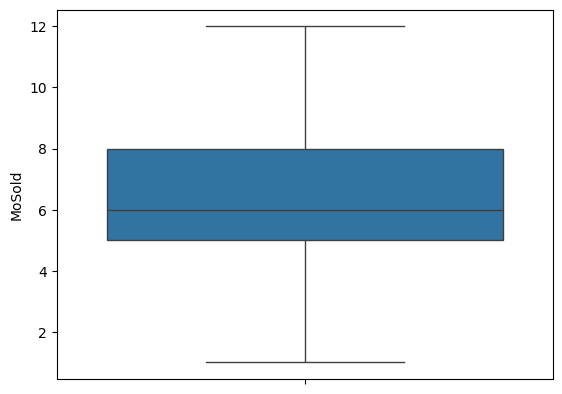

YrSold


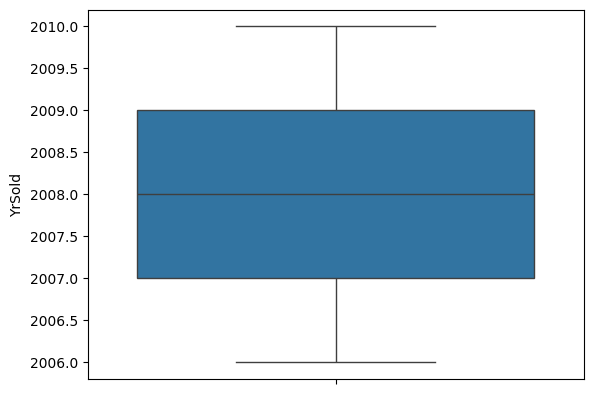

SalePrice


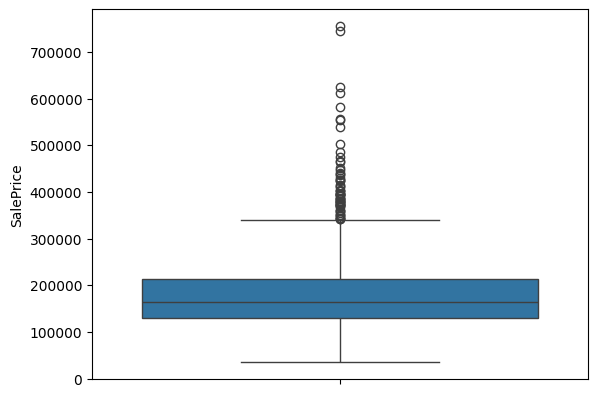

HasGarage


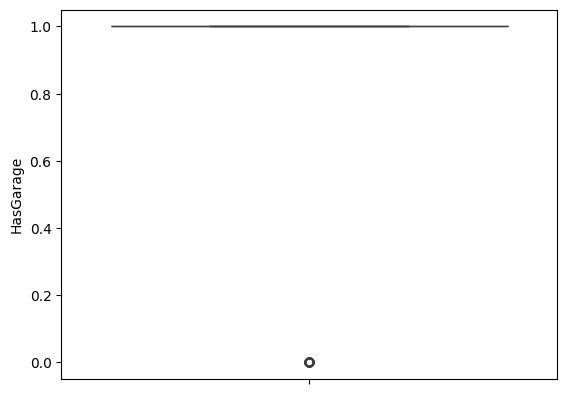

GarageYrBltMissing


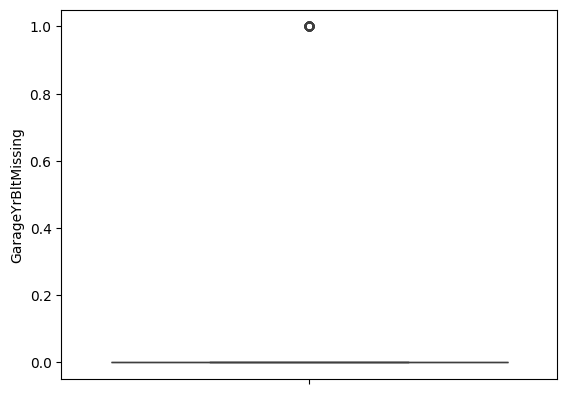

HasMasVnr


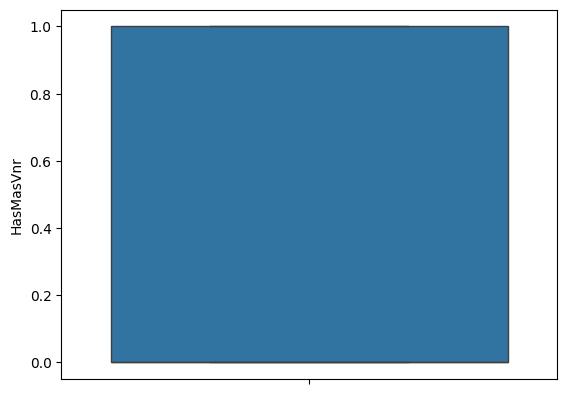

In [850]:
df_object = df_train.select_dtypes(include=['float64','int64'])
for col in df_object.columns:
    if col in skip_columns:
        continue
    print(col)
    sns.boxplot(df_object[col])
    plt.show()

In [851]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasGarage,GarageYrBltMissing,HasMasVnr
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,1,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,1,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1,0,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,1,0,1


In [852]:
len(df_train)

1460

In [853]:
Q1 = df_train['MSSubClass'].quantile(0.25)
Q3 = df_train['MSSubClass'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
upper_array = np.where(df_train['MSSubClass'] >= upper_bound)[0]
lower_array = np.where(df_train['MSSubClass'] <= lower_bound)[0]

df_train.drop(index=upper_array, inplace=True)
df_train.drop(index=lower_array, inplace=True)

In [854]:
# df_train.to_csv('df_train_no_outliers.csv', index=False)

# Correlation Analysis

In [855]:
numeric_df = df_train.select_dtypes(include=['number', 'bool'])
sale_price_corr = numeric_df.corr()['SalePrice'].copy()

top_correlations = sale_price_corr.abs().sort_values(ascending=False)

print("--- Features Sorted by Individual Correlation Strength with SalePrice ---")
print(top_correlations.drop('SalePrice'))

--- Features Sorted by Individual Correlation Strength with SalePrice ---
OverallQual           0.798851
GrLivArea             0.716765
GarageCars            0.643753
GarageArea            0.623376
TotalBsmtSF           0.602280
1stFlrSF              0.595744
FullBath              0.573884
TotRmsAbvGrd          0.550273
YearBuilt             0.543038
YearRemodAdd          0.516374
MasVnrArea            0.501624
Fireplaces            0.460885
HasMasVnr             0.386434
BsmtFinSF1            0.385646
2ndFlrSF              0.350759
WoodDeckSF            0.327561
LotFrontage           0.323524
OpenPorchSF           0.317200
HalfBath              0.315228
LotArea               0.263986
GarageYrBlt           0.257783
BsmtFullBath          0.234033
GarageYrBltMissing    0.230593
HasGarage             0.230593
BsmtUnfSF             0.197938
BedroomAbvGr          0.165741
EnclosedPorch         0.140782
KitchenAbvGr          0.123441
ScreenPorch           0.105800
PoolArea              0.091

In [856]:
categorical_cols_to_encode = [
    # 'Alley',
    # 'PoolQC',
    # 'Fence',
    # 'MiscFeature',
    'Street',
    'BsmtCond', 'MasVnrType',
    'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond',
    'MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC',
    'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
    'SaleType', 'SaleCondition'
]

df_train = pd.get_dummies(df_train, columns=categorical_cols_to_encode, drop_first=True)
df_test = pd.get_dummies(df_test, columns=categorical_cols_to_encode, drop_first=True)


In [857]:
df_train.to_csv('data/cleaned_train.csv', index=False)
df_test.to_csv('data/cleaned_test.csv', index=False)